## 1. Imports

In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
sns.set_theme(style='darkgrid')
set_colors = ["#6a8caf", "#590d22"]
sns.set_palette(set_colors)
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency 
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from collections import Counter 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
DATA_DIR = os.path.join(os.getcwd(), 'data')
TRAIN_PATH = os.path.join(DATA_DIR, 'churn-bigml-80.csv')
TEST_PATH = os.path.join(DATA_DIR, 'churn-bigml-20.csv')

train_raw = pd.read_csv(TRAIN_PATH)
test_raw = pd.read_csv(TEST_PATH)

# Exploratory Data Analysis

In [88]:
train_raw.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [89]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [90]:
train_raw.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [91]:
train_raw.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [92]:
### Classfying columns as: Categorical, Numerical, Categorical but Cardinal
def get_column_types(dataframe, categorical_thershold=10, cardinal_thershold=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < categorical_thershold and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_thershold and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [93]:
cat_cols, num_cols, cat_but_car = get_column_types(train_raw)

Observations: 2666
Variables: 20
cat_cols: 4
num_cols: 15
cat_but_car: 1
num_but_cat: 2


In [94]:
print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')
print(f'Cardinal Columns: {cat_but_car}')

Categorical Columns: ['International plan', 'Voice mail plan', 'Area code', 'Churn']
Numerical Columns: ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
Cardinal Columns: ['State']


In [95]:
train_raw["State"].nunique()

51

In [96]:
train_raw['Area code'].unique()

array([415, 408, 510])

## Visualizations

### Distribution of Churn Rate Samples

([<matplotlib.axis.XTick at 0x18dac7890>,
 [Text(0, 0, 'No Churn (0)'), Text(1, 0, 'Churn (1)')])

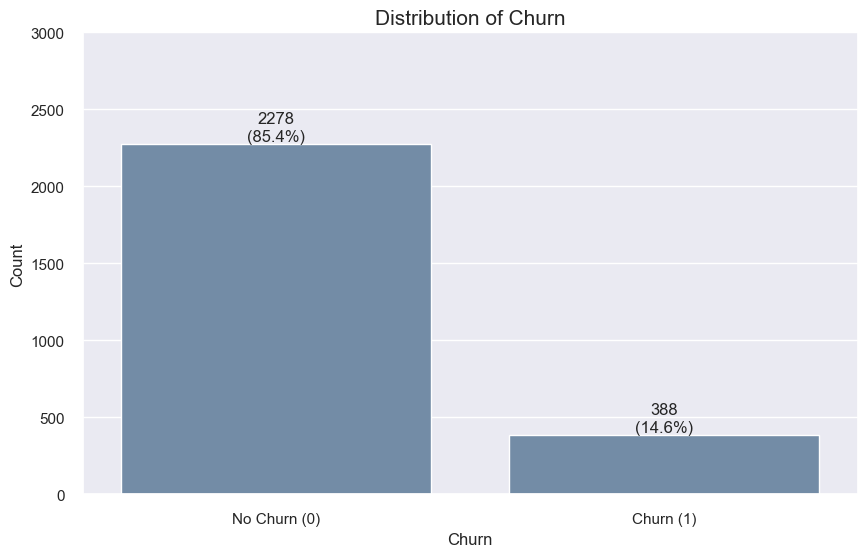

In [97]:
value_counts = train_raw.Churn.value_counts(normalize=True) * 100
total_count = len(train_raw)

plt.figure(figsize=(10, 6))
plt.ylim(0, 3000)
ax = sns.countplot(x=train_raw.Churn)

for i, p in enumerate(ax.patches):
    count = p.get_height()
    percentage = round(count / total_count * 100, 1)
    ax.annotate(f'{int(count)}\n({percentage}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)

plt.title('Distribution of Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])

### Checking Churn Dependence on State

In [98]:
## Chi-quared test to check the dependence between Churn and State
def chi_2_test(df, col2,col1 = "Churn"):
    data = pd.crosstab(df[col1], df[col2], rownames=[col1], colnames=[col2])
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print(f"{col2} and {col1} are dependant!")
    else : 
        print(f"{col2} and {col1} are independant!")

In [99]:
chi_2_test(train_raw,"State")

p value is 0.004680701679944942
State and Churn are dependant!


In [100]:
tab = pd.crosstab(train_raw["Churn"], train_raw["State"], rownames=['Churn'], colnames=['State'], normalize = "columns")
tab.T

Churn     False     True 
State                    
AK     0.930233  0.069767
AL     0.893939  0.106061
AR     0.765957  0.234043
AZ     0.933333  0.066667
CA     0.791667  0.208333
CO     0.881356  0.118644
CT     0.813559  0.186441
DC     0.888889  0.111111
DE     0.843137  0.156863
FL     0.870370  0.129630
GA     0.836735  0.163265
HI     0.954545  0.045455
IA     0.921053  0.078947
ID     0.910714  0.089286
IL     0.911111  0.088889
IN     0.888889  0.111111
KS     0.807692  0.192308
KY     0.860465  0.139535
LA     0.914286  0.085714
MA     0.846154  0.153846
MD     0.766667  0.233333
ME     0.775510  0.224490
MI     0.775862  0.224138
MN     0.814286  0.185714
MO     0.901961  0.098039
MS     0.770833  0.229167
MT     0.811321  0.188679
NC     0.839286  0.160714
ND     0.909091  0.090909
NE     0.911111  0.088889
NH     0.790698  0.209302
NJ     0.720000  0.280000
NM     0.909091  0.090909
NV     0.786885  0.213115
NY     0.823529  0.176471
OH     0.848485  0.151515
OK     0.865385  0.134615
OR     0.887097  0.112903
PA     0.777778  0.222222
RI     0.937500  0.062500
SC     0.775510  0.224490
SD     0.877551  0.122449
TN     0.878049  0.121951
TX     0.709091  0.290909
UT     0.866667  0.133333
VA     0.940299  0.059701
VT     0.894737  0.105263
WA     0.791667  0.208333
WI     0.934426  0.065574
WV     0.920455  0.079545
WY     0.878788  0.121212

### Grouping States Based on Churn Rate

As observed from the cross-tabular data relationship above, the churn rate for a state tends to fall into one of three categories:

- **0–10%**
- **10–20%**
- **>20%**

To simplify analysis and reduce dimensionality from 51 categorical state values, we group states based on their churn rate into the following categories:

| State Group | Churn Rate Range       |
|-------|-------------------------|
| 0     | 0% ≤ churn rate < 10%   |
| 1     | 10% ≤ churn rate < 20%  |
| 2     | churn rate ≥ 20%        |

This new categorical column can be used in place of the original `State` column for more efficient modeling and clearer interpretation.


In [101]:
churn_more10 = list(tab.iloc[1][((tab.iloc[1] > 0.1) & (tab.iloc[1] < 0.2))].index)
churn_more20 = list(tab.iloc[1][(tab.iloc[1] > 0.2)].index)
churn_less10 = list(tab.iloc[1][tab.iloc[1] < 0.1].index)

In [102]:
train_raw["State"].replace(churn_less10,0, inplace = True)
train_raw["State"].replace(churn_more10,1, inplace = True)
train_raw["State"].replace(churn_more20,2, inplace = True)

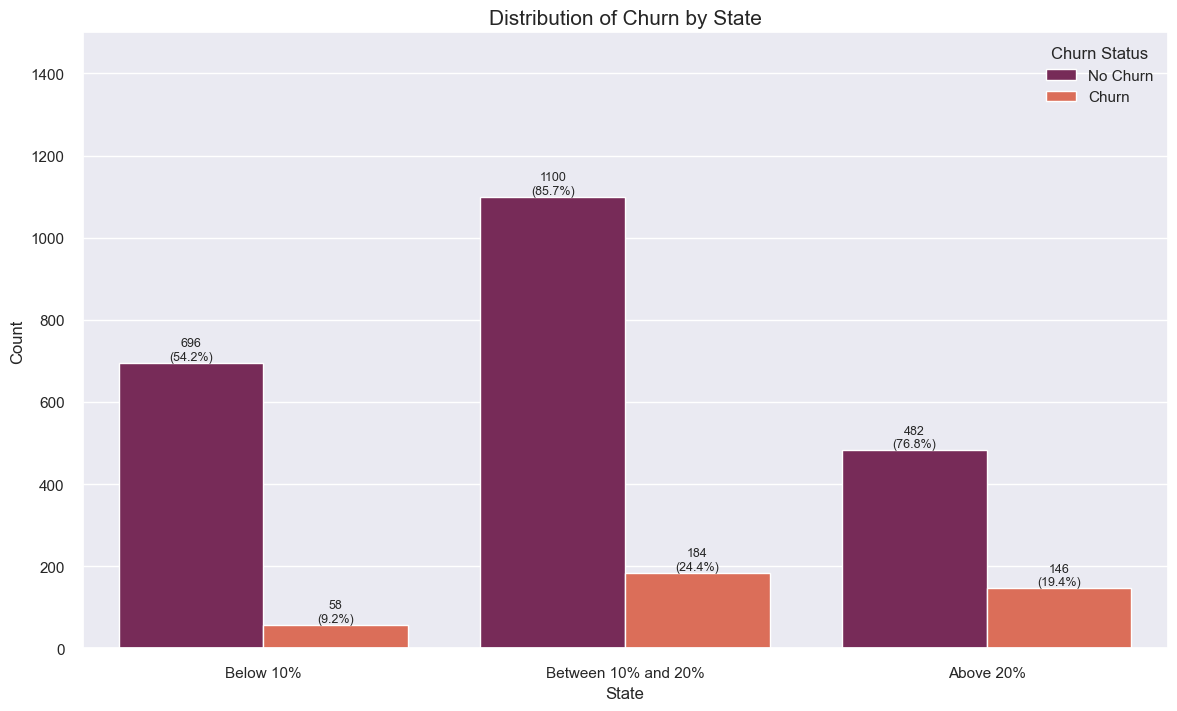

In [103]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=train_raw, x="State", hue="Churn", palette='rocket')
plt.ylim(0, 1500)

state_counts = train_raw.groupby(['State', 'Churn']).size().unstack(fill_value=0)
state_totals = state_counts.sum(axis=1)

for i, p in enumerate(ax.patches):

    count = p.get_height()
    state_idx = i // 2
    churn_idx = i % 2

    state_name = train_raw['State'].unique()[state_idx] if state_idx < len(train_raw['State'].unique()) else None
    
    if state_name is not None:
        percentage = round((count / state_totals[state_name]) * 100, 1) if count > 0 else 0
        ax.annotate(f'{int(count)}\n({percentage}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=9, rotation=0)

plt.xticks(range(len(train_raw['State'].unique())), ["Below 10%", "Between 10% and 20%", "Above 20%"])

plt.title('Distribution of Churn by State', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Churn Status', labels=['No Churn', 'Churn'])

In [104]:
chi_2_test(train_raw,"State")

p value is 3.164053922894711e-15
State and Churn are dependant!


## Analysis of Numerical Features

In [105]:
num_features = ["Account length",
    "Number vmail messages",
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge']

<Figure size 1400x800 with 0 Axes>

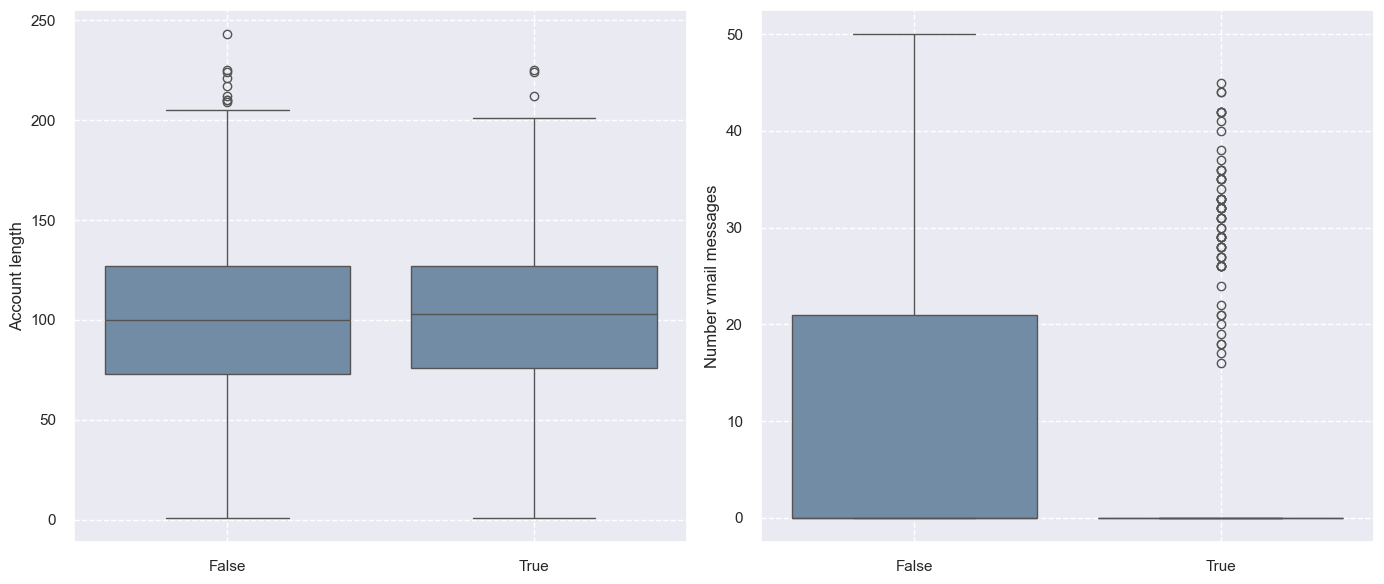

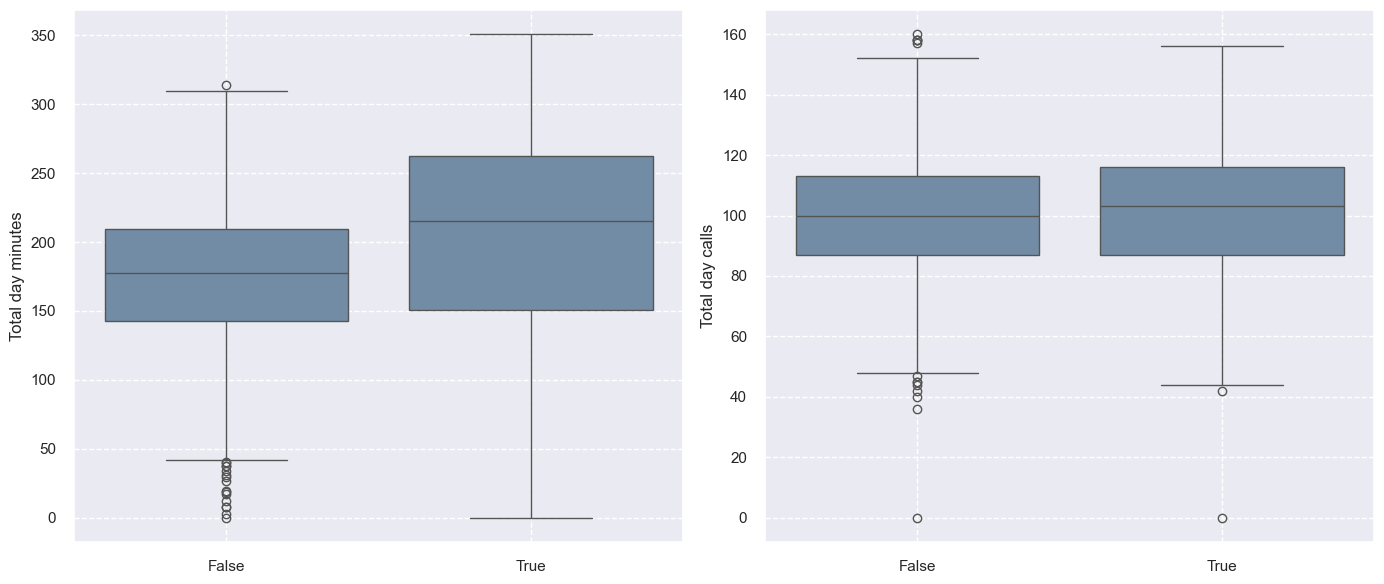

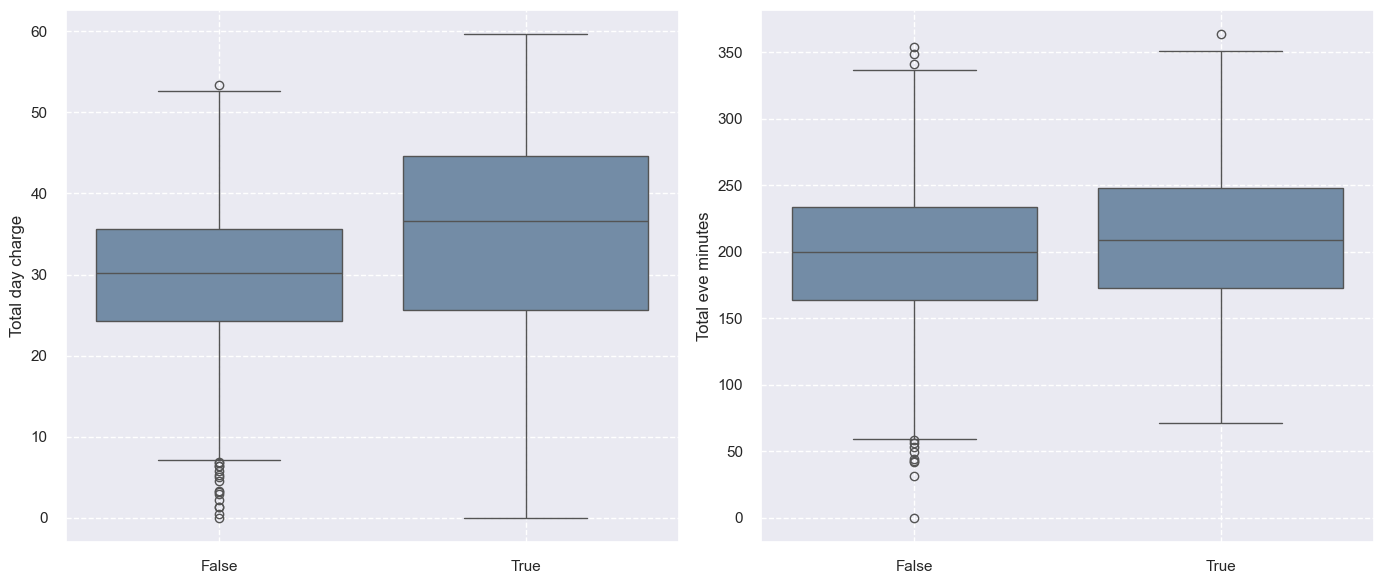

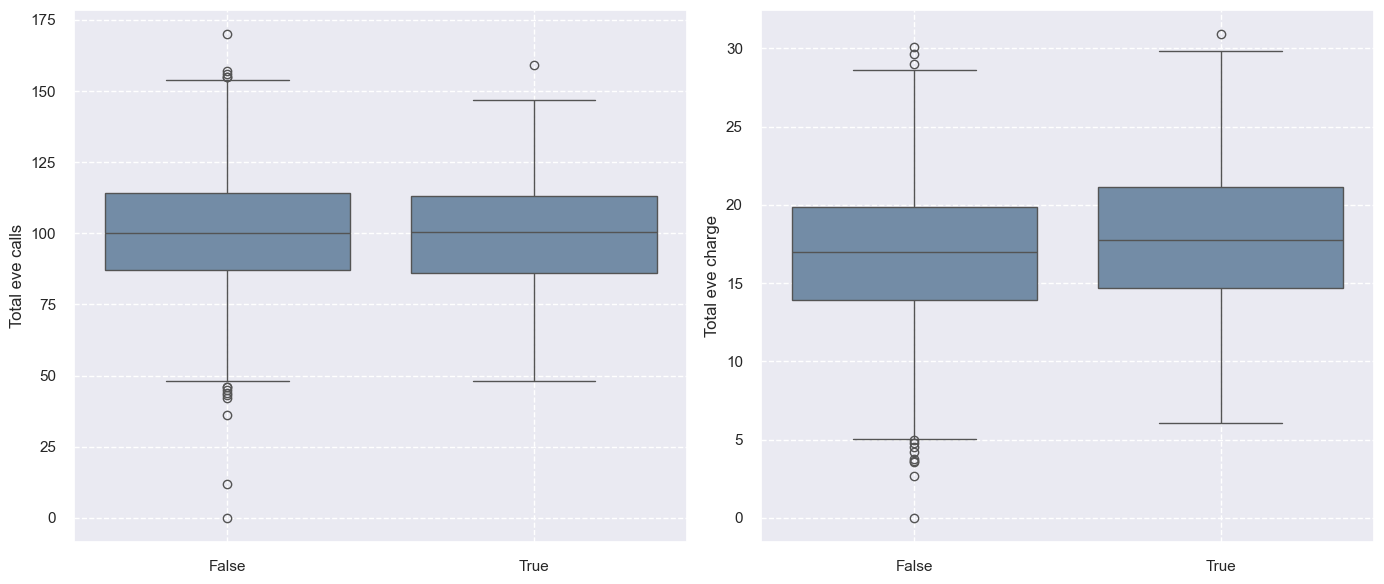

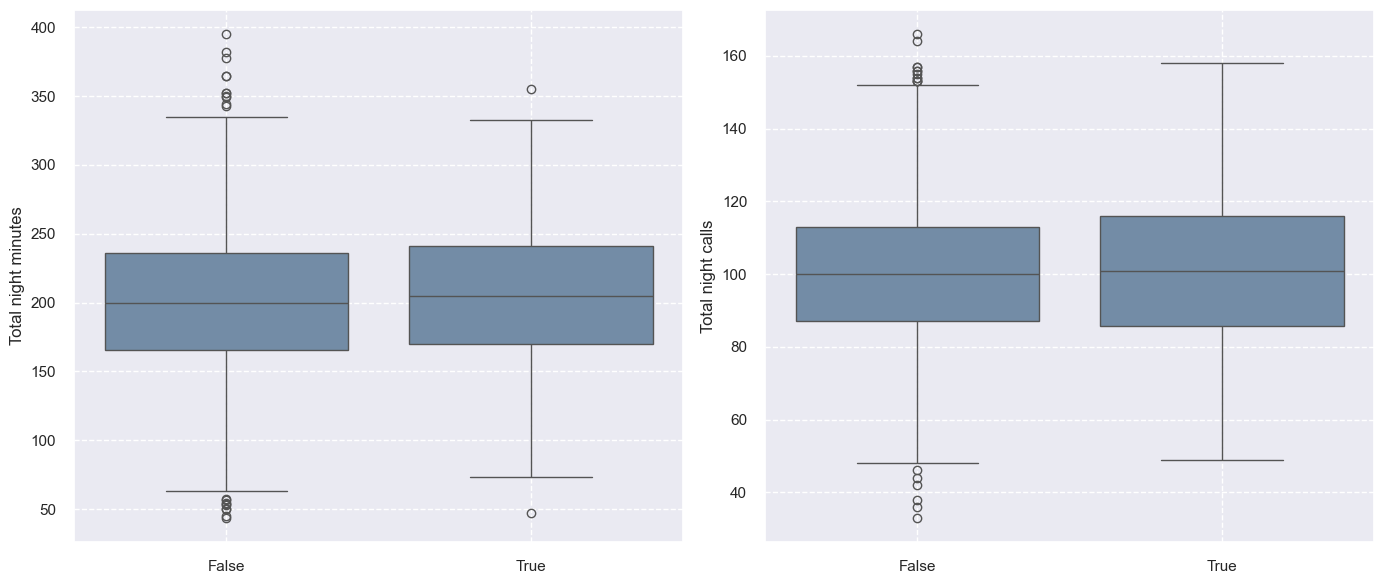

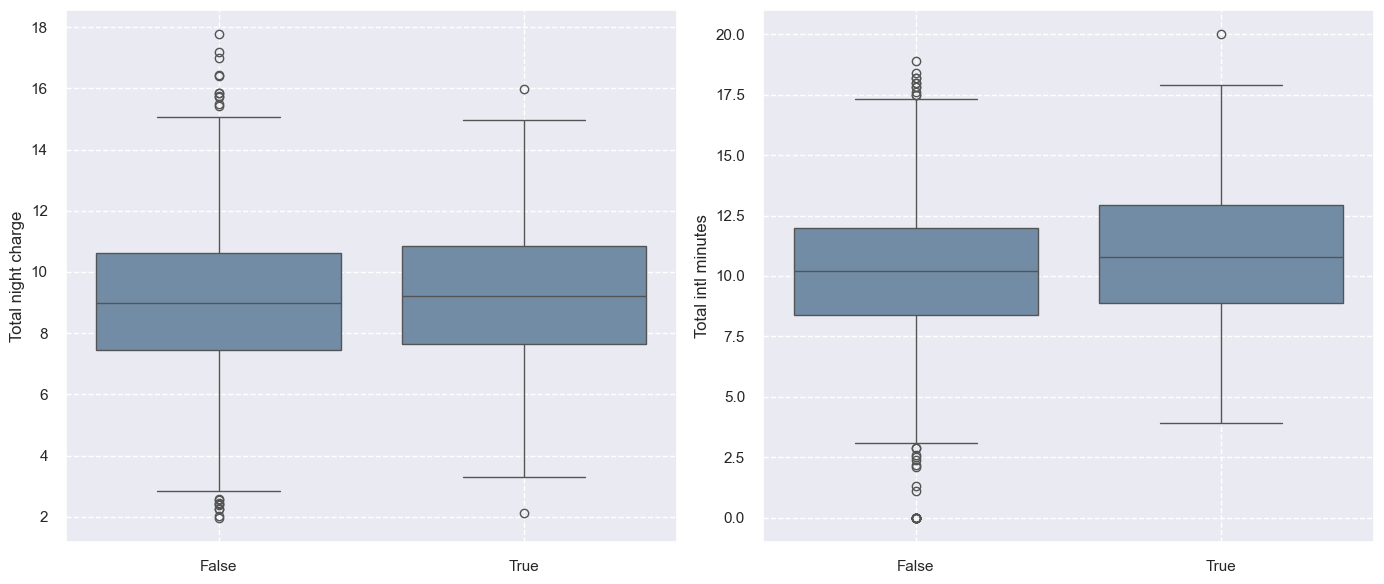

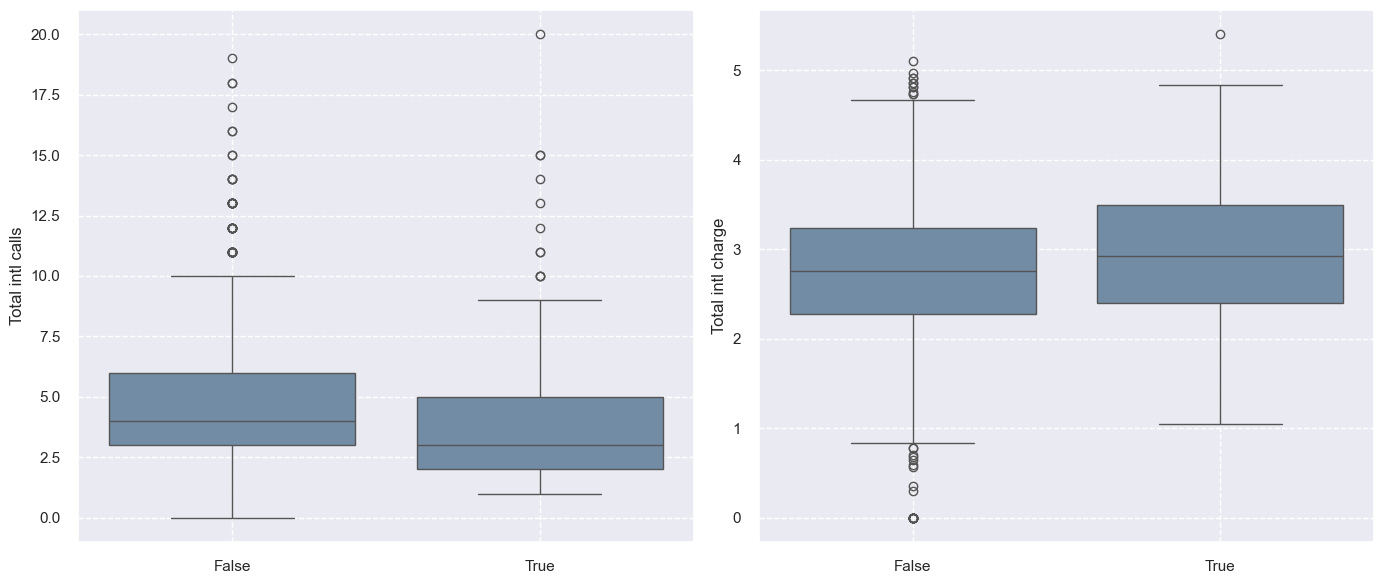

In [106]:
plt.figure(figsize=(14, 8))
for i in range(0, len(num_features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.boxplot(train_raw, y=num_features[i], x="Churn", ax=axes[0])
    axes[0].grid(True, which='both', linestyle='--')
    axes[0].set(xlabel='')
    
    if i+1 < len(num_features):
        sns.boxplot(train_raw, y=num_features[i+1], x="Churn", ax=axes[1])
        axes[1].grid(True, which='both', linestyle='--')
        axes[1].set(xlabel='')
    else:
        axes[1].set_visible(False)
    
    plt.tight_layout()
    plt.show()

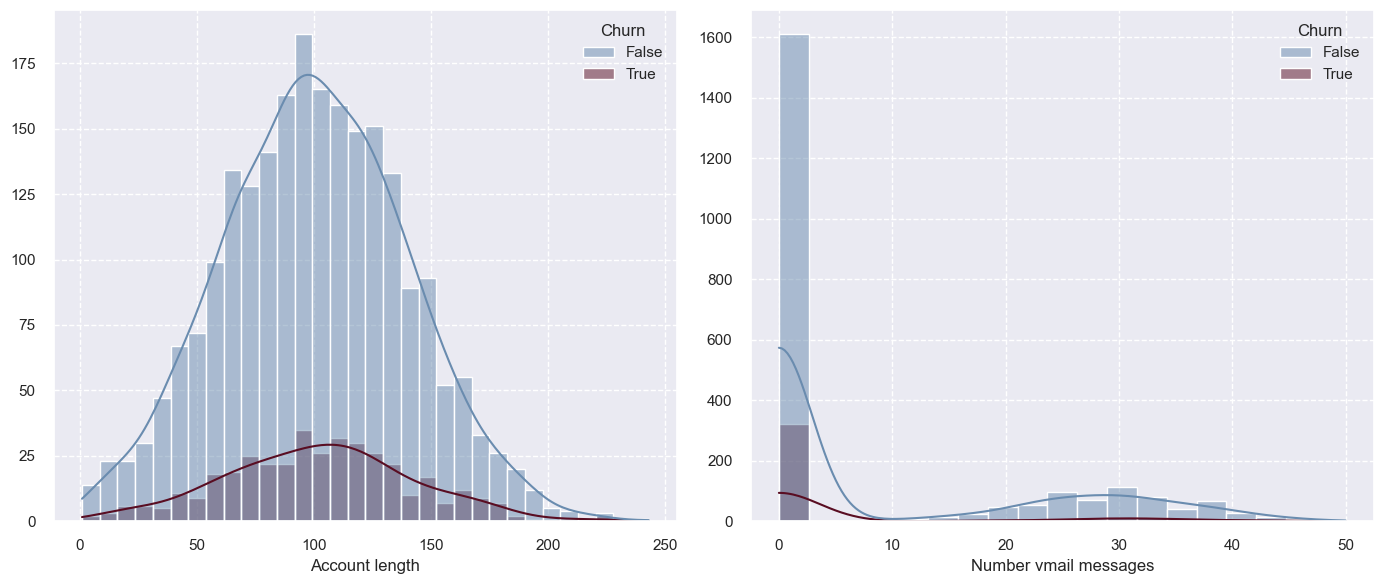

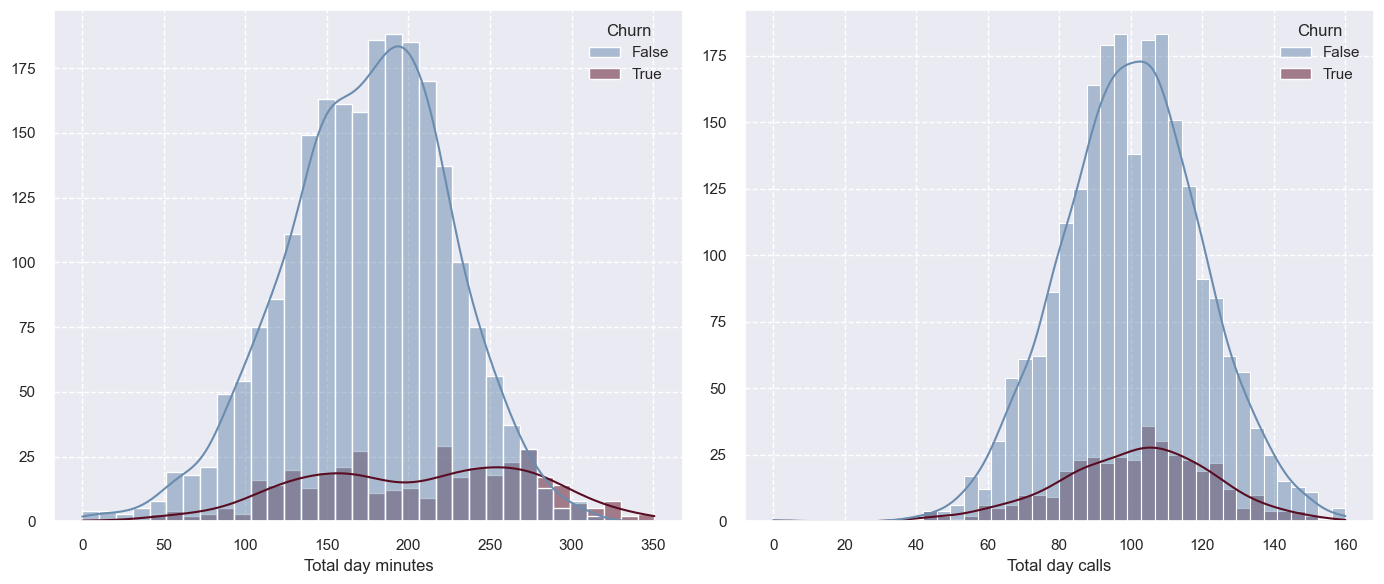

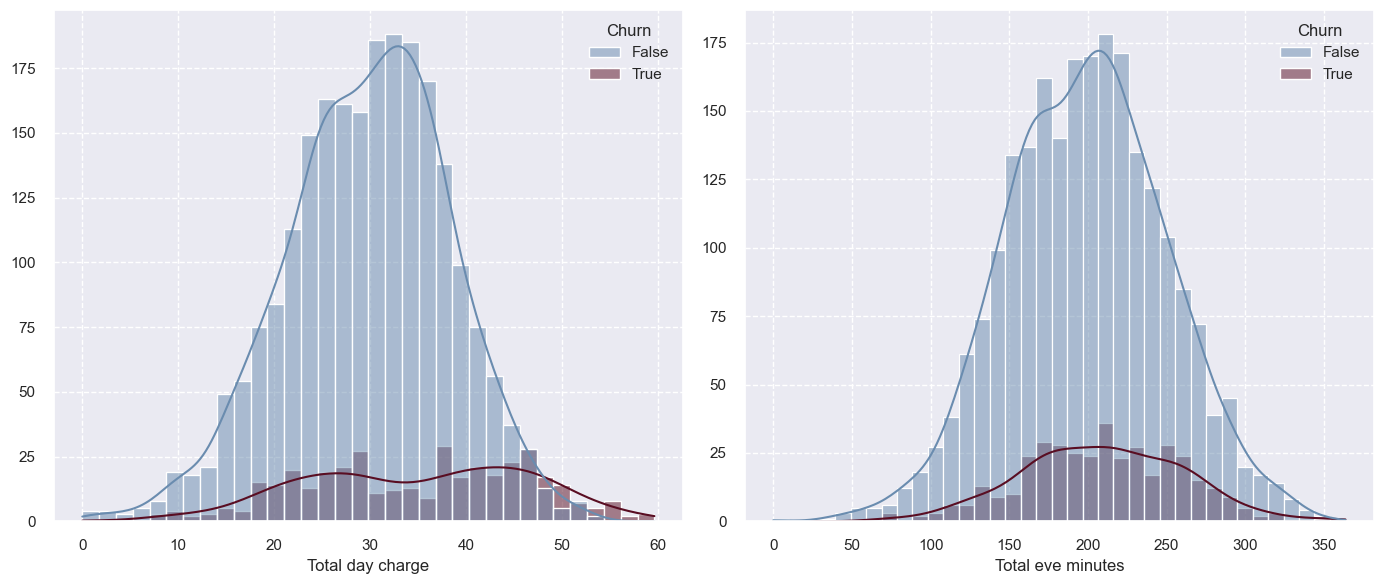

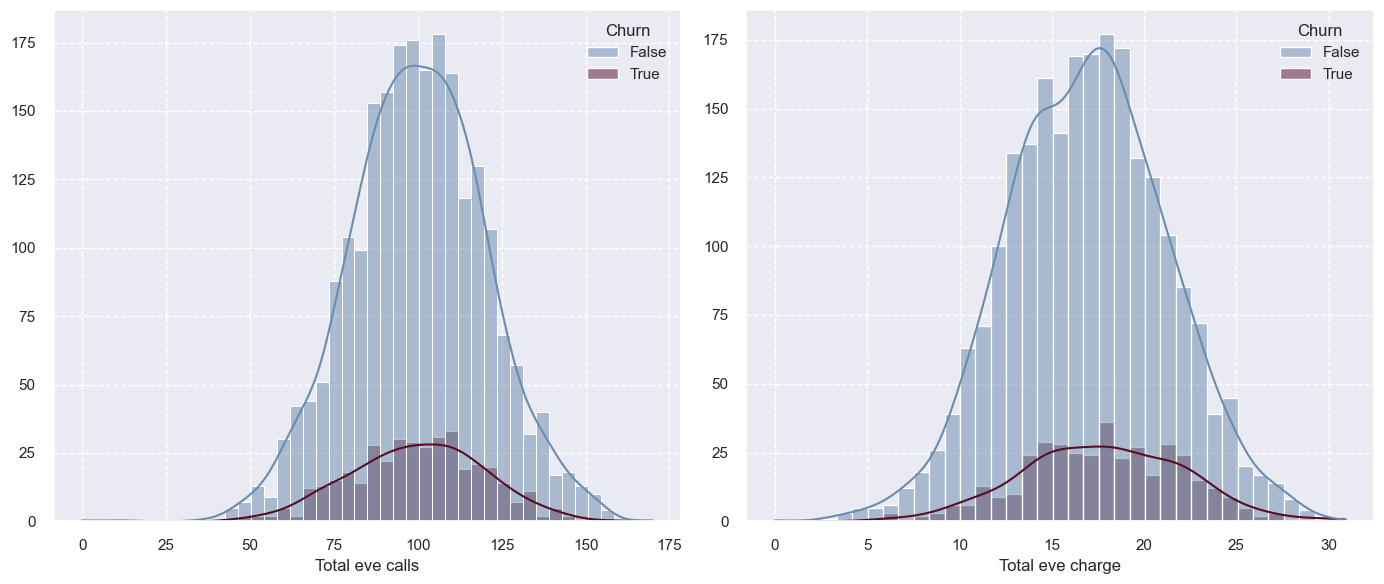

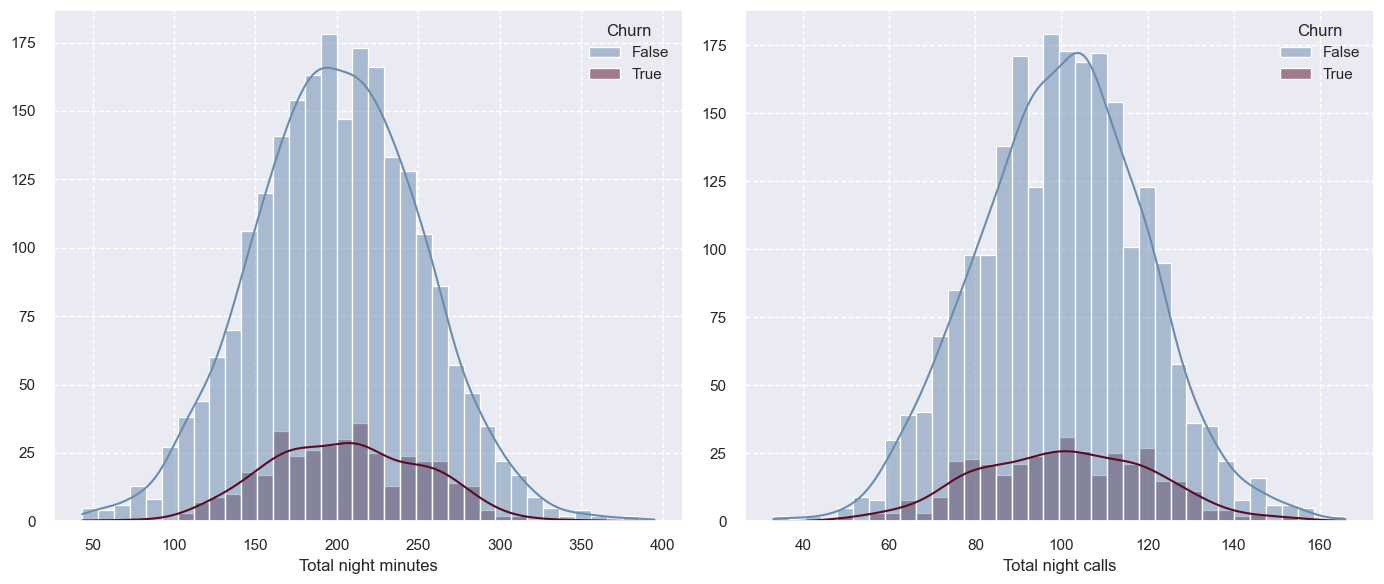

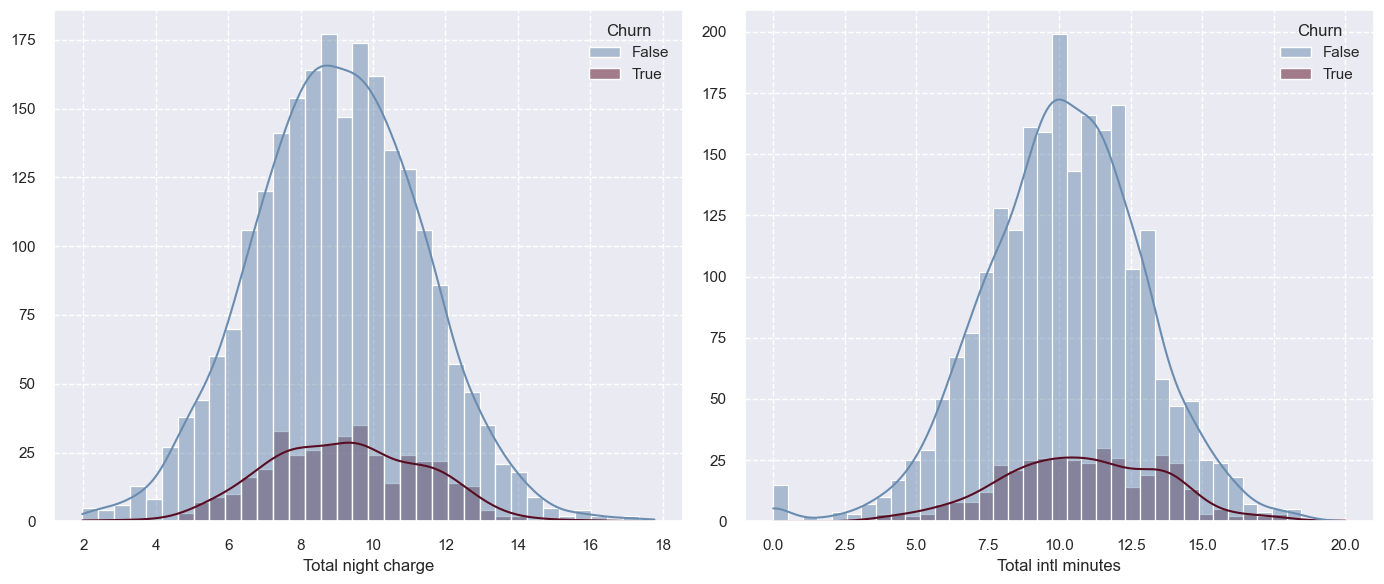

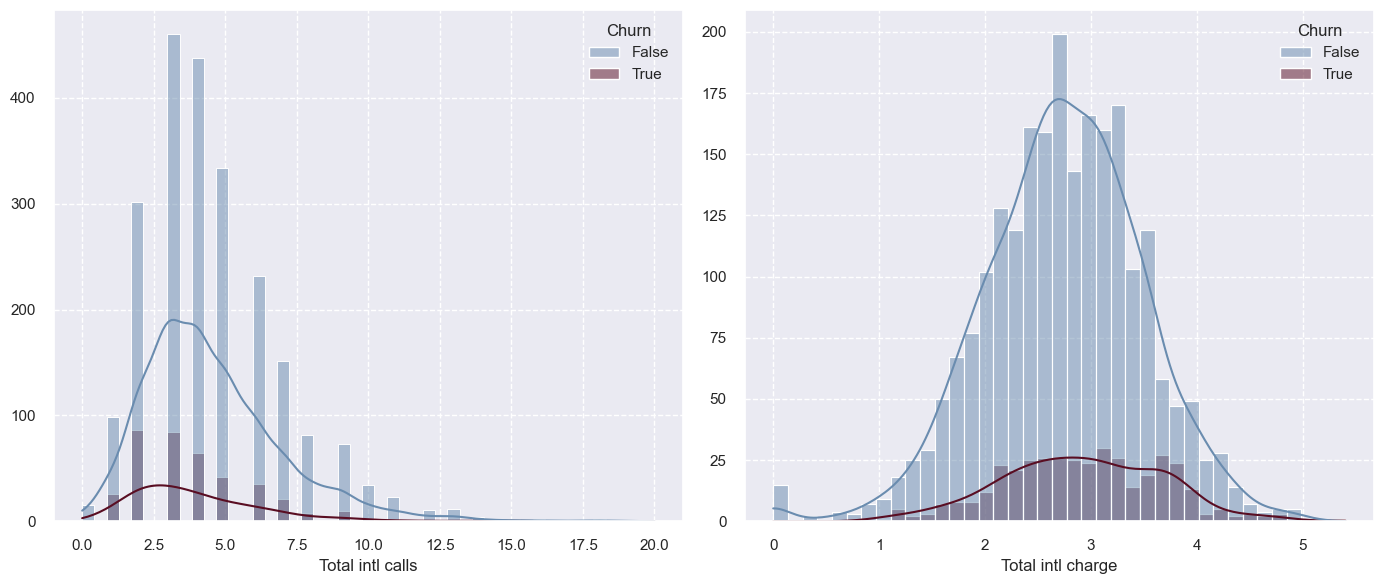

In [107]:
for i in range(0, len(num_features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(train_raw, x=num_features[i], hue="Churn", kde=True, ax=axes[0])
    axes[0].grid(True, which='both', linestyle='--')
    axes[0].set(ylabel='')

    if i+1 < len(num_features):
        sns.histplot(train_raw, x=num_features[i+1], hue="Churn", kde=True, ax=axes[1])
        axes[1].grid(True, which='both', linestyle='--')
        axes[1].set(ylabel='')
    else:
        axes[1].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## Outlier Analysis

In [108]:
### Using z-score to detect outliers
def outlier_set(data, variance_bound):
    outliers = []
    zscore = []
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > variance_bound:
            outliers.append(i)
    return set(outliers)

In [109]:
for col in num_features:
    print(f"Outliers of {col} are: ",outlier_set(train_raw[col], variance_bound = 3))

Outliers of Account length are:  {224, 225, 243, 221}
Outliers of Number vmail messages are:  {50}
Outliers of Total day minutes are:  {0.0, 2.6, 7.9, 7.8, 12.5, 345.3, 346.8, 350.8}
Outliers of Total day calls are:  {40, 0, 36}
Outliers of Total day charge are:  {0.0, 1.34, 2.13, 0.44, 58.7, 1.33, 58.96, 59.64}
Outliers of Total eve minutes are:  {0.0, 354.2, 42.2, 43.9, 42.5, 363.7, 31.2}
Outliers of Total eve calls are:  {0, 170, 12, 36}
Outliers of Total eve charge are:  {0.0, 2.65, 3.73, 3.61, 3.59, 30.91, 30.11}
Outliers of Total night minutes are:  {354.9, 43.7, 364.3, 45.0, 395.0, 364.9, 47.4, 377.5, 381.9}
Outliers of Total night calls are:  {33, 164, 36, 38, 166}
Outliers of Total night charge are:  {1.97, 2.03, 2.13, 15.97, 16.39, 17.19, 16.99, 17.77, 16.42}
Outliers of Total intl minutes are:  {0.0, 1.3, 1.1, 18.9, 20.0}
Outliers of Total intl calls are:  {12, 13, 14, 15, 16, 17, 18, 19, 20}
Outliers of Total intl charge are:  {0.0, 0.35, 0.3, 5.1, 5.4}


## Multi-Colinearity Detection

<AxesSubplot: >

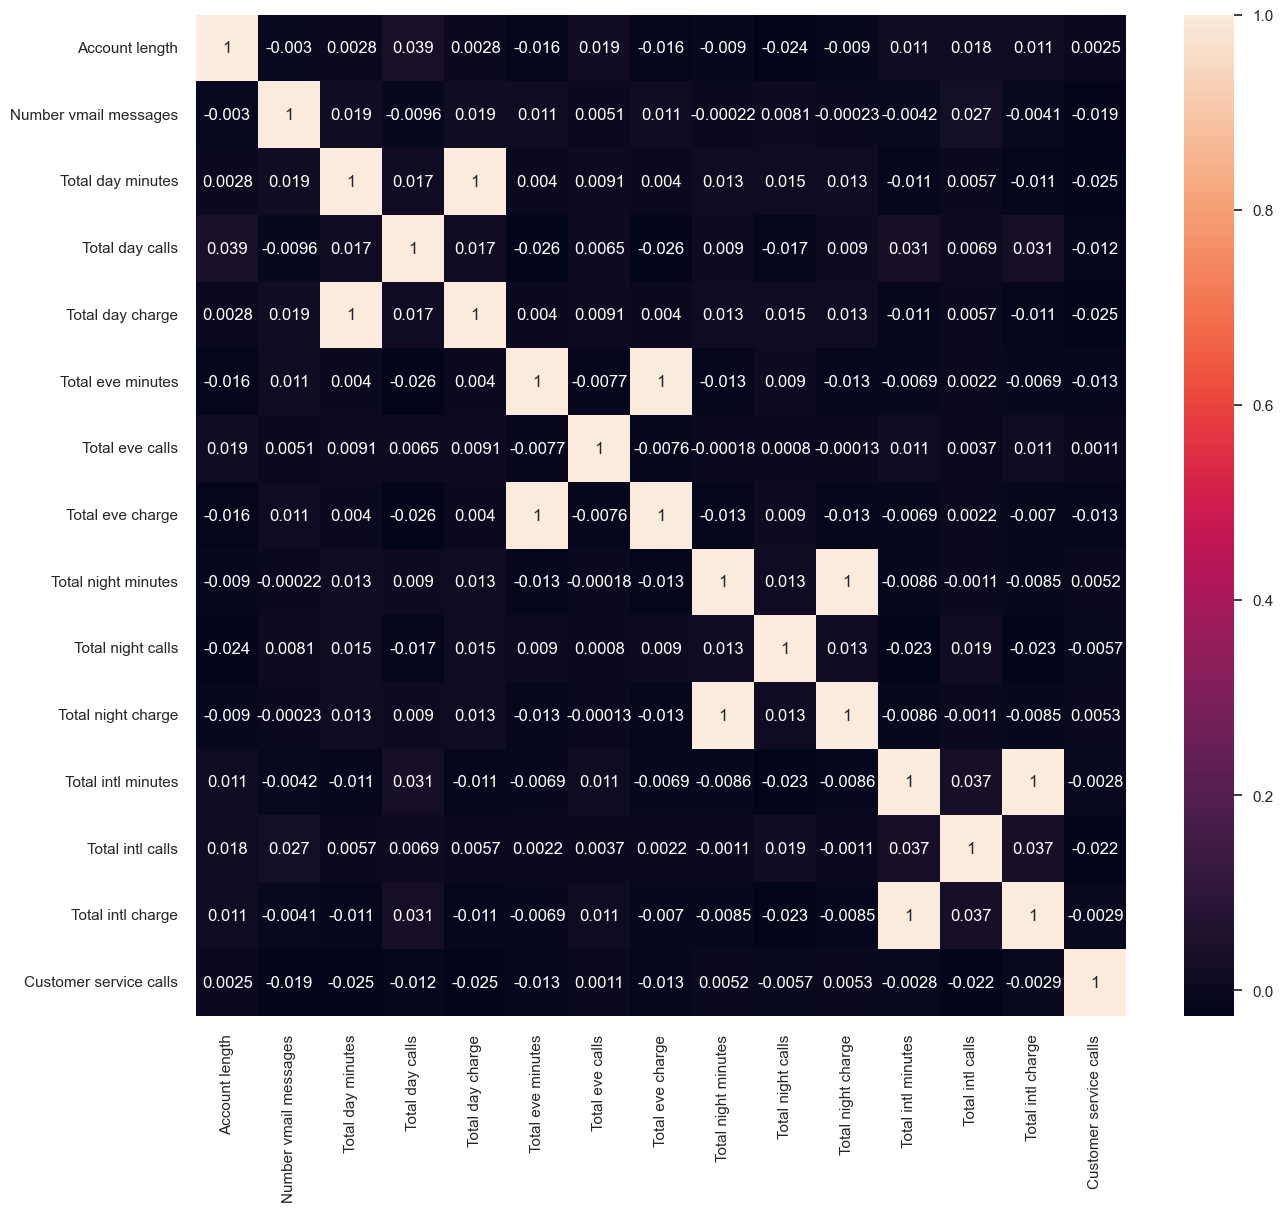

In [110]:
plt.figure(figsize = (15,13))
sns.heatmap(train_raw[num_cols].corr(), annot = True)

We can see from the correlation matrix above that we have directly correlated variables. Total day minutes has a correlation of 1 with Total day charge. Similarly for Total eve charge and Total eve minutes, Total night minutes and Total night charge, Total international minutes and Total international charge. These high correlations make sense since the more time is spent on call, the higher the charge will be. We do not needs both variables (charge and minutes) as they are essentially relaying the same information so we drop "Total day minutes", "Total eve charge", "Total night minutes" and "Total international minutes"

In [111]:
drop_candidates = ["Total day minutes", "Total eve charge", "Total night minutes", "Total intl minutes"]

<AxesSubplot: >

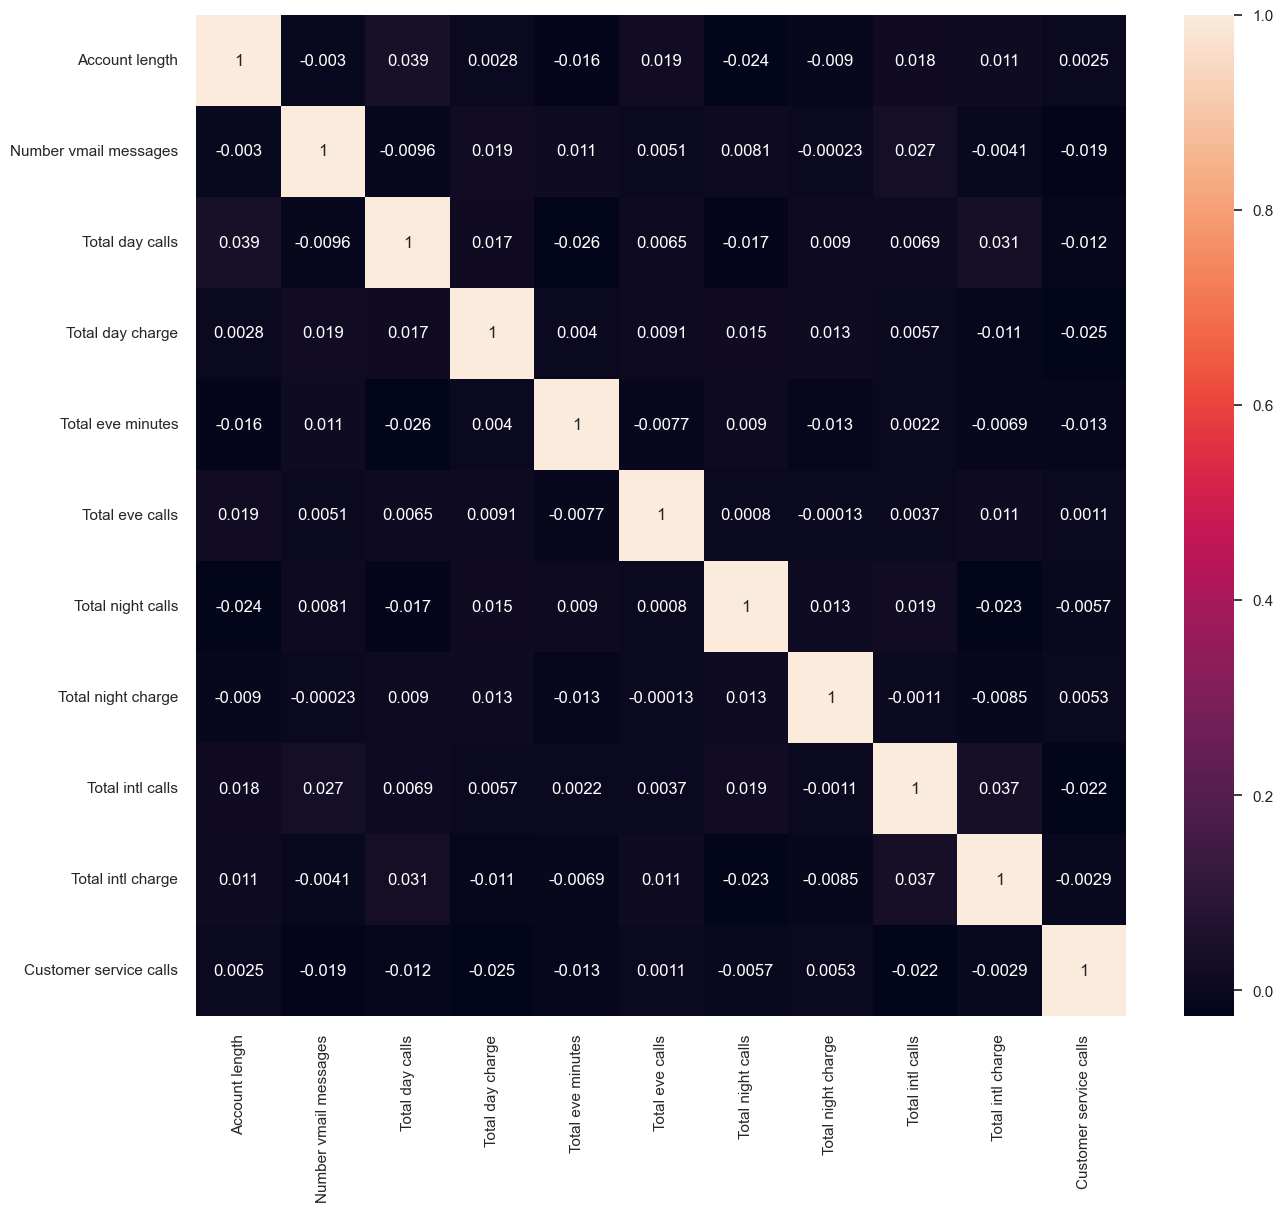

In [112]:
plt.figure(figsize = (15,13))
sns.heatmap(train_raw[num_cols].drop(drop_candidates, axis = 1).corr(), annot = True)

In [113]:
train_raw.replace(["No","Yes"],[0,1], inplace = True)  ### encoding categorical variables
train_raw.replace([False,True],[0,1], inplace = True)

In [114]:
SAVE_DIR = os.path.join(DATA_DIR, 'post-processing')
output_path = os.path.join(SAVE_DIR, 'train_processed.csv')
train_raw.to_csv(output_path)

In [115]:
train_processsed = train_raw.drop("Churn", axis = 1)
val_processed = train_raw["Churn"]

In [116]:
processed_train, processed_test, val_train, val_test = train_test_split(train_processsed, val_processed, test_size = 0.2, random_state = 42, stratify = val_processed)

### Transforming Features

In [117]:
class CustomFeatures(BaseEstimator, TransformerMixin):
    def __init__(self,to_drop):
        self.to_drop = to_drop

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["Total number of minutes"] = X["Total day minutes"] + X["Total eve minutes"] + X["Total night minutes"]
        X["Total minutes per call"] = (X["Total number of minutes"]) / (X["Total day calls"] + X["Total eve calls"] + X["Total night calls"])
        X["Average charge per call"] = (X["Total day charge"] + X["Total eve charge"] + X["Total night charge"]) / (X["Total number of minutes"])
        X["International usage rate"] = (X["Total intl minutes"]) / (X["Total number of minutes"])
        
        return X.drop(self.to_drop, axis = 1)

In [118]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, num_features, cat_features, onehot_features, scaler=StandardScaler()):
        self.scaler = scaler
        self.num_features = num_features
        self.cat_features = cat_features
        self.onehot_features = onehot_features

    def fit(self, X, y=None):
        self.scaler.fit(X[self.num_features])
        return self

    def transform(self, X):
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.num_features]),
                                columns=X[self.num_features].columns,
                                index=X[self.num_features].index)           ### scaling numerical features
        dummies = pd.get_dummies(X[self.onehot_features].astype("object")).iloc[:,:2]           ### one-hot encoding categorical features
        X = pd.concat([X[self.cat_features],X_scaled], axis = 1)
        X = pd.concat([X,dummies], axis = 1)
        return X

In [119]:
cat_features =["State","International plan","Voice mail plan", "Customer service calls"]
one_hot_features = ["Area code"]
num_features = ["Account length",
    "Number vmail messages",
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total night calls',
    'Total night charge',
    'Total intl calls',
    'Total intl charge',
    "Total number of minutes",
    "Total minutes per call",
    "Average charge per call",
    "International usage rate"]

In [120]:
pipeline = Pipeline(
    steps=[
        ('feature_creation', CustomFeatures(drop_candidates)),('scaling', FeatureScaler(num_features, cat_features, one_hot_features))
    ])

In [121]:
processed_train_wf = pipeline.fit_transform(processed_train)
processed_test_wf = pipeline.transform(processed_test)

Now that we have removed highly correlated features (feature selection) and performed feature transformation, we are ready to perform segmentation and churn prediction.

## Customer Segmentation

In [122]:
clustering_data = processed_train_wf.copy()

We use the elbow method and silhouette score to determine the optimal number of clusters for KMeans clustering. 

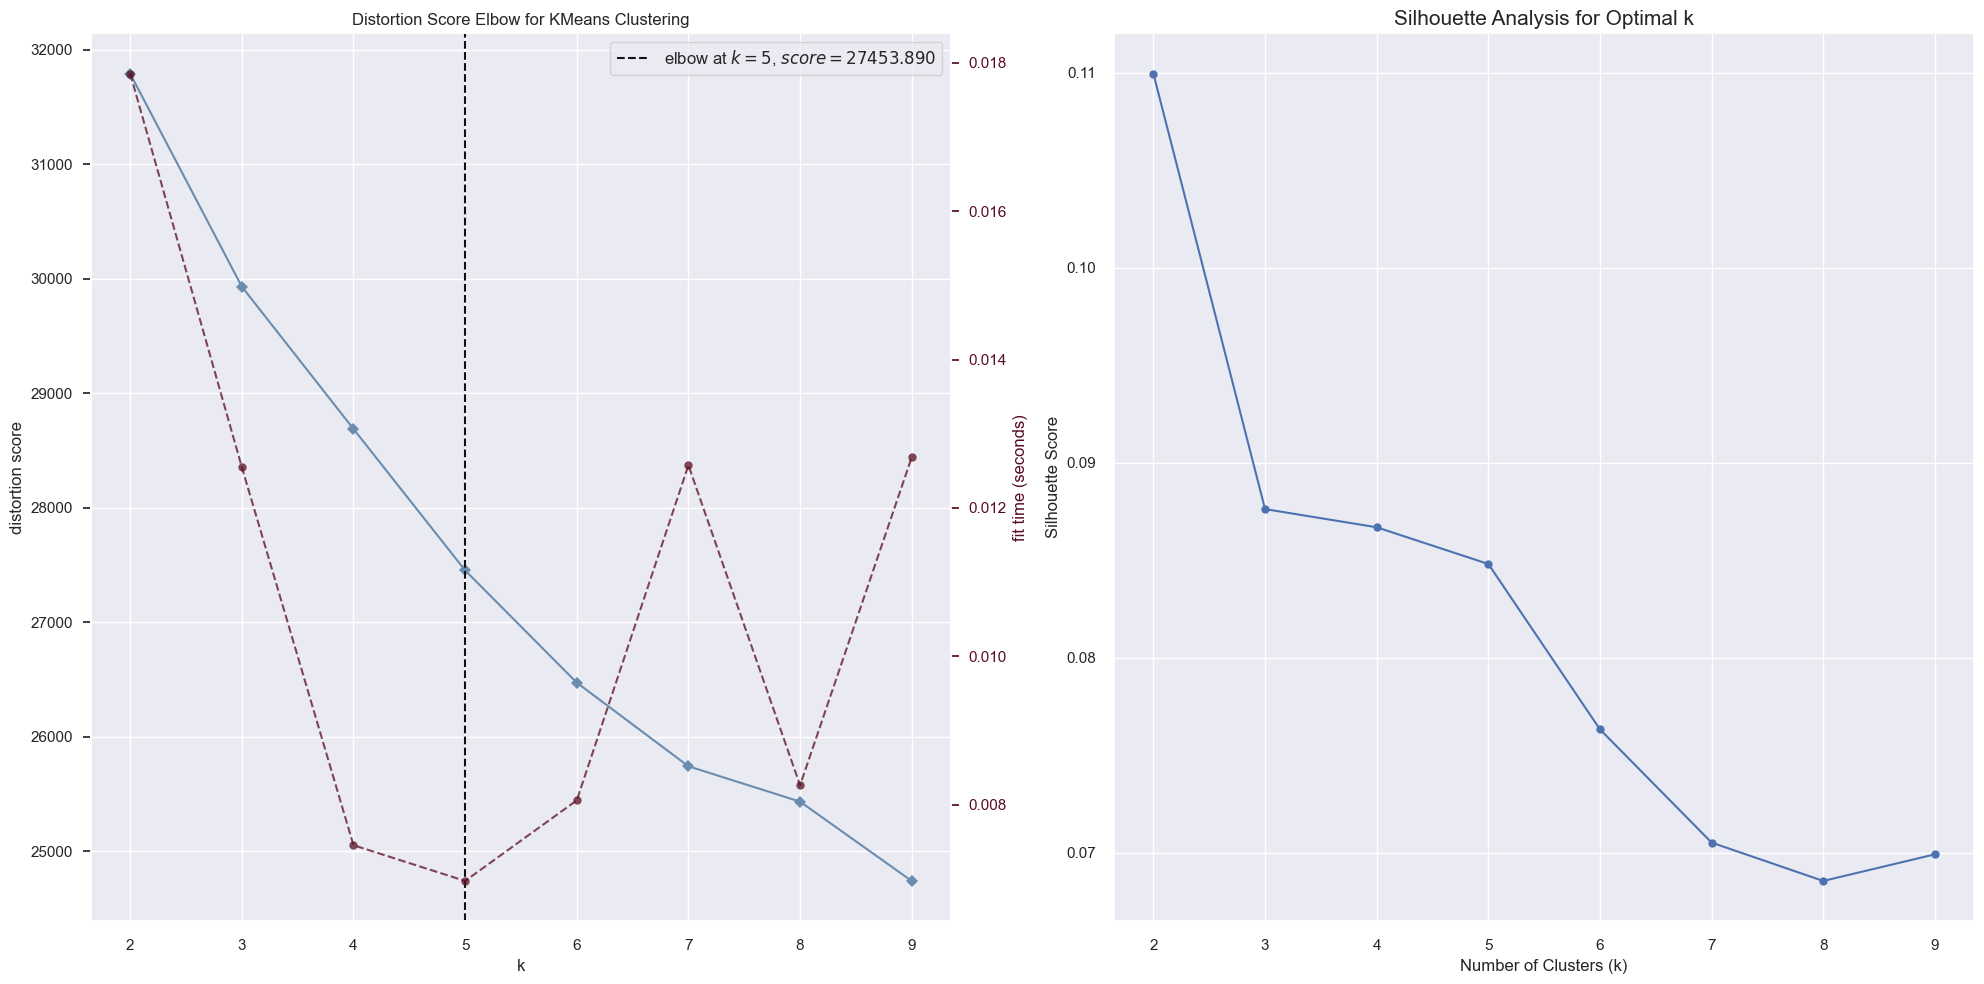

In [123]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
elbow_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
elbow_visualizer.fit(clustering_data)
elbow_visualizer.finalize()
# plt.title('Elbow Method for Optimal k', fontsize=15)

plt.subplot(1, 2, 2)
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(clustering_data)
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k', fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.show()

In [124]:
optimal_k = elbow_visualizer.elbow_value_
print(f"Optimal number of clusters determined: {optimal_k}")

Optimal number of clusters determined: 5


In [125]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(clustering_data)

In [126]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(clustering_data)

In [127]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(clustering_data)

In [128]:
### Hyperparameter seach for DBSCAN

eps_values = np.arange(0.3, 8.0, 0.1)
min_samples_values = [2, 3, 5, 7, 10]

results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(clustering_data)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if n_clusters < 2:
            continue

        sil_score = silhouette_score(clustering_data, dbscan_labels)
        results.append((eps, min_samples, sil_score, n_clusters))


results_df = pd.DataFrame(results, columns=["eps", "min_samples", "silhouette", "n_clusters"])
results_df = results_df.sort_values(by="silhouette", ascending=False)
optimal_eps = results_df.iloc[0]["eps"]
optimal_samples = int(results_df.iloc[0]["min_samples"])

In [129]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_samples)
dbscan_labels = dbscan.fit_predict(clustering_data)

In [130]:
processed_train['KMeans_Cluster'] = kmeans_labels
processed_train['Hierarchical_Cluster'] = hierarchical_labels
processed_train['GMM_Cluster'] = gmm_labels
processed_train['DBSCAN_Cluster'] = dbscan_labels

In [131]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data)
print(f"Explained variance ratio by first two principal components: {pca.explained_variance_ratio_}")

Explained variance ratio by first two principal components: [0.18960093 0.11540566]


In [132]:
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2']
)

In [133]:
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['Hierarchical_Cluster'] = hierarchical_labels
pca_df['GMM_Cluster'] = gmm_labels
pca_df['DBSCAN_Cluster'] = dbscan_labels
pca_df['Churn'] = val_train.values

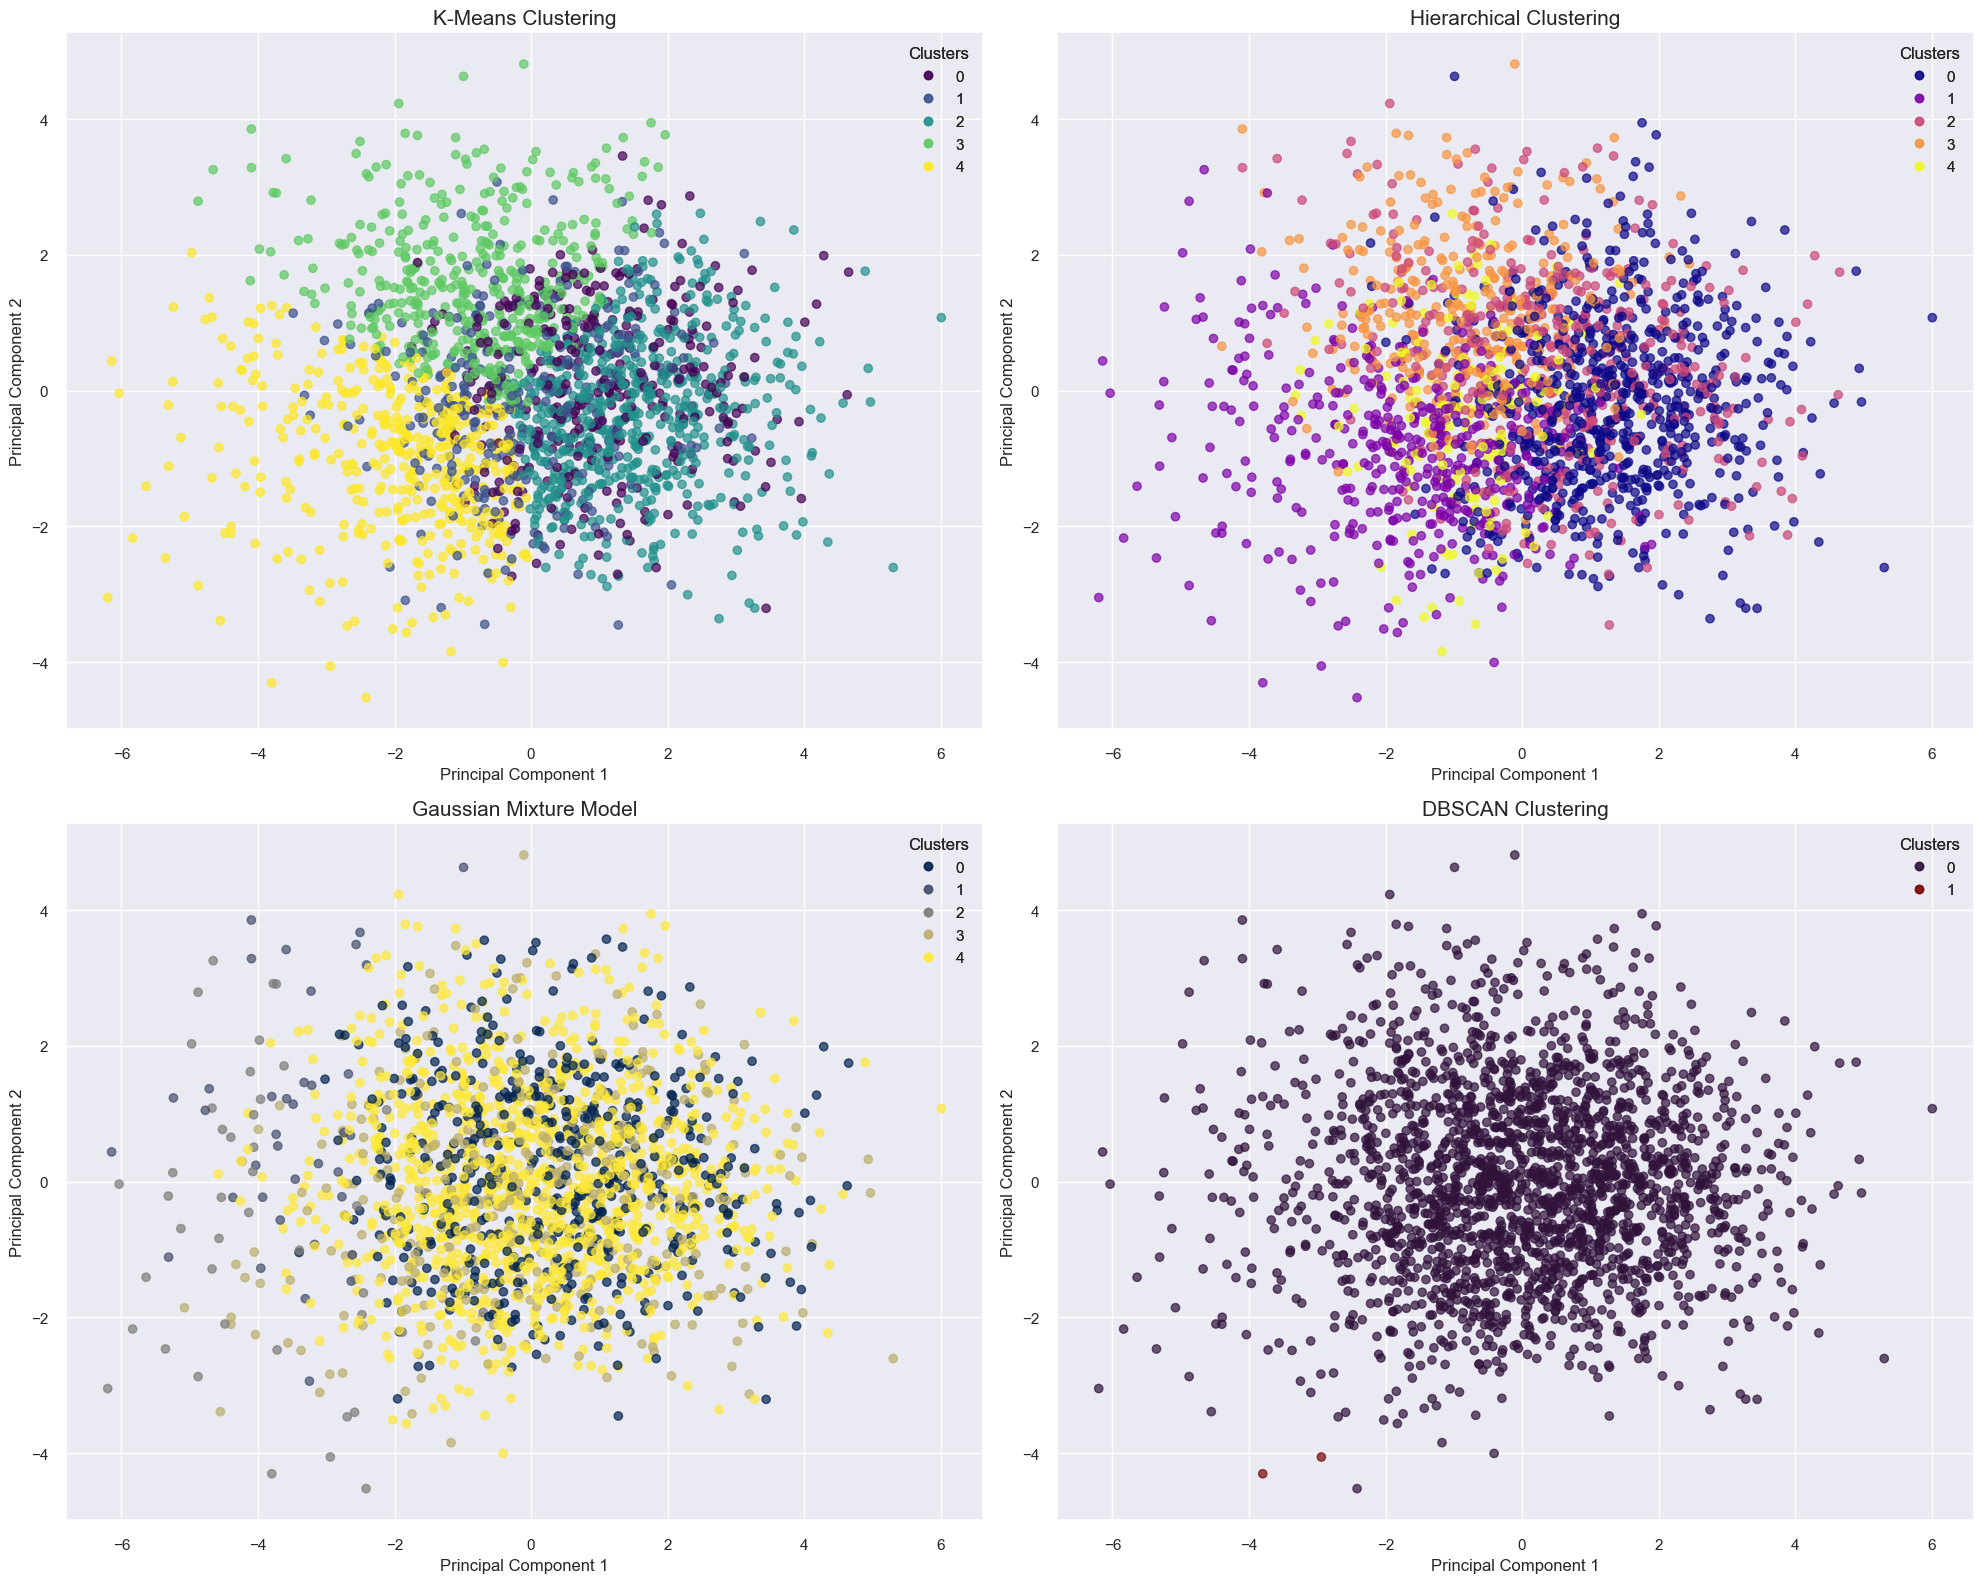

In [134]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

scatter = axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means Clustering', fontsize=15)
axes[0].set_xlabel('Principal Component 1', fontsize=12)
axes[0].set_ylabel('Principal Component 2', fontsize=12)
legend1 = axes[0].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[0].add_artist(legend1)
axes[0].grid(True)

scatter = axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Hierarchical_Cluster'], cmap='plasma', alpha=0.7)
axes[1].set_title('Hierarchical Clustering', fontsize=15)
axes[1].set_xlabel('Principal Component 1', fontsize=12)
axes[1].set_ylabel('Principal Component 2', fontsize=12)
legend2 = axes[1].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[1].add_artist(legend2)
axes[1].grid(True)

scatter = axes[2].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['GMM_Cluster'], cmap='cividis', alpha=0.7)
axes[2].set_title('Gaussian Mixture Model', fontsize=15)
axes[2].set_xlabel('Principal Component 1', fontsize=12)
axes[2].set_ylabel('Principal Component 2', fontsize=12)
legend3 = axes[2].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[2].add_artist(legend3)
axes[2].grid(True)

scatter = axes[3].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['DBSCAN_Cluster'], cmap='turbo', alpha=0.7)
axes[3].set_title('DBSCAN Clustering', fontsize=15)
axes[3].set_xlabel('Principal Component 1', fontsize=12)
axes[3].set_ylabel('Principal Component 2', fontsize=12)
legend4 = axes[3].legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
axes[3].add_artist(legend4)
axes[3].grid(True)

plt.tight_layout()
plt.show()

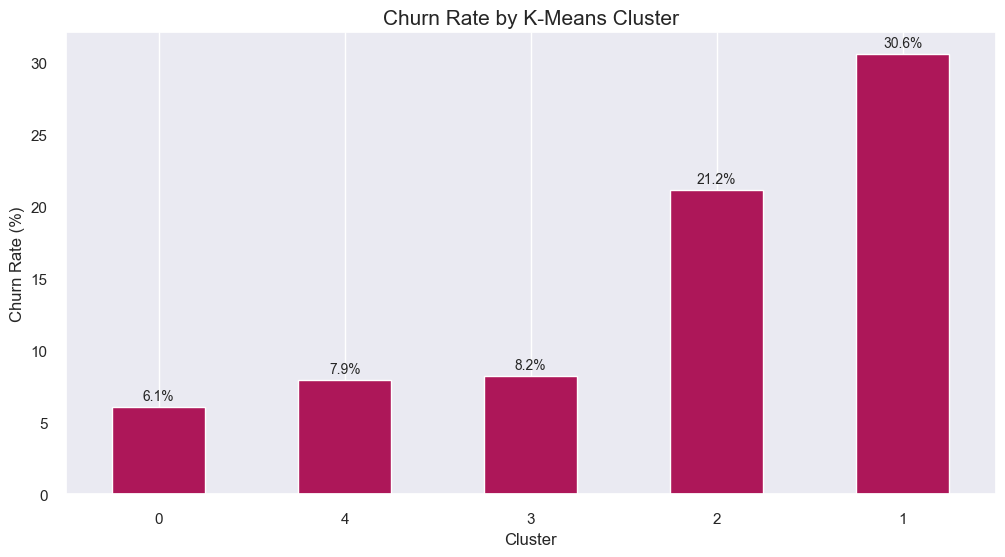

In [135]:
cluster_churn = pd.crosstab(processed_train['KMeans_Cluster'], val_train, normalize='index') * 100

plt.figure(figsize=(12, 6))
cluster_churn[1].sort_values().plot(kind='bar', color=sns.color_palette("rocket")[2])
plt.title('Churn Rate by K-Means Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=0)

for i, v in enumerate(cluster_churn[1].sort_values()):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.show()

In [136]:
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=clustering_data.columns
)

In [137]:
feature_means = processed_train_wf.mean()
feature_stds = processed_train_wf.std()

For K-Means clustering, we obtain 5 clusters where two have very high churn rates - 30% and 21% and the other three have significantly lower churn rates - 6%, 8% and 8%. To understand the clusters of customers we look at the relative feature importance for each cluster. This will also indicate why two clusters have higher churn rates than the other three. 

In [138]:
relative_importance = pd.DataFrame()
for i in range(optimal_k):
    relative_importance[f'Cluster_{i}'] = (cluster_centers.iloc[i] - feature_means) / feature_stds

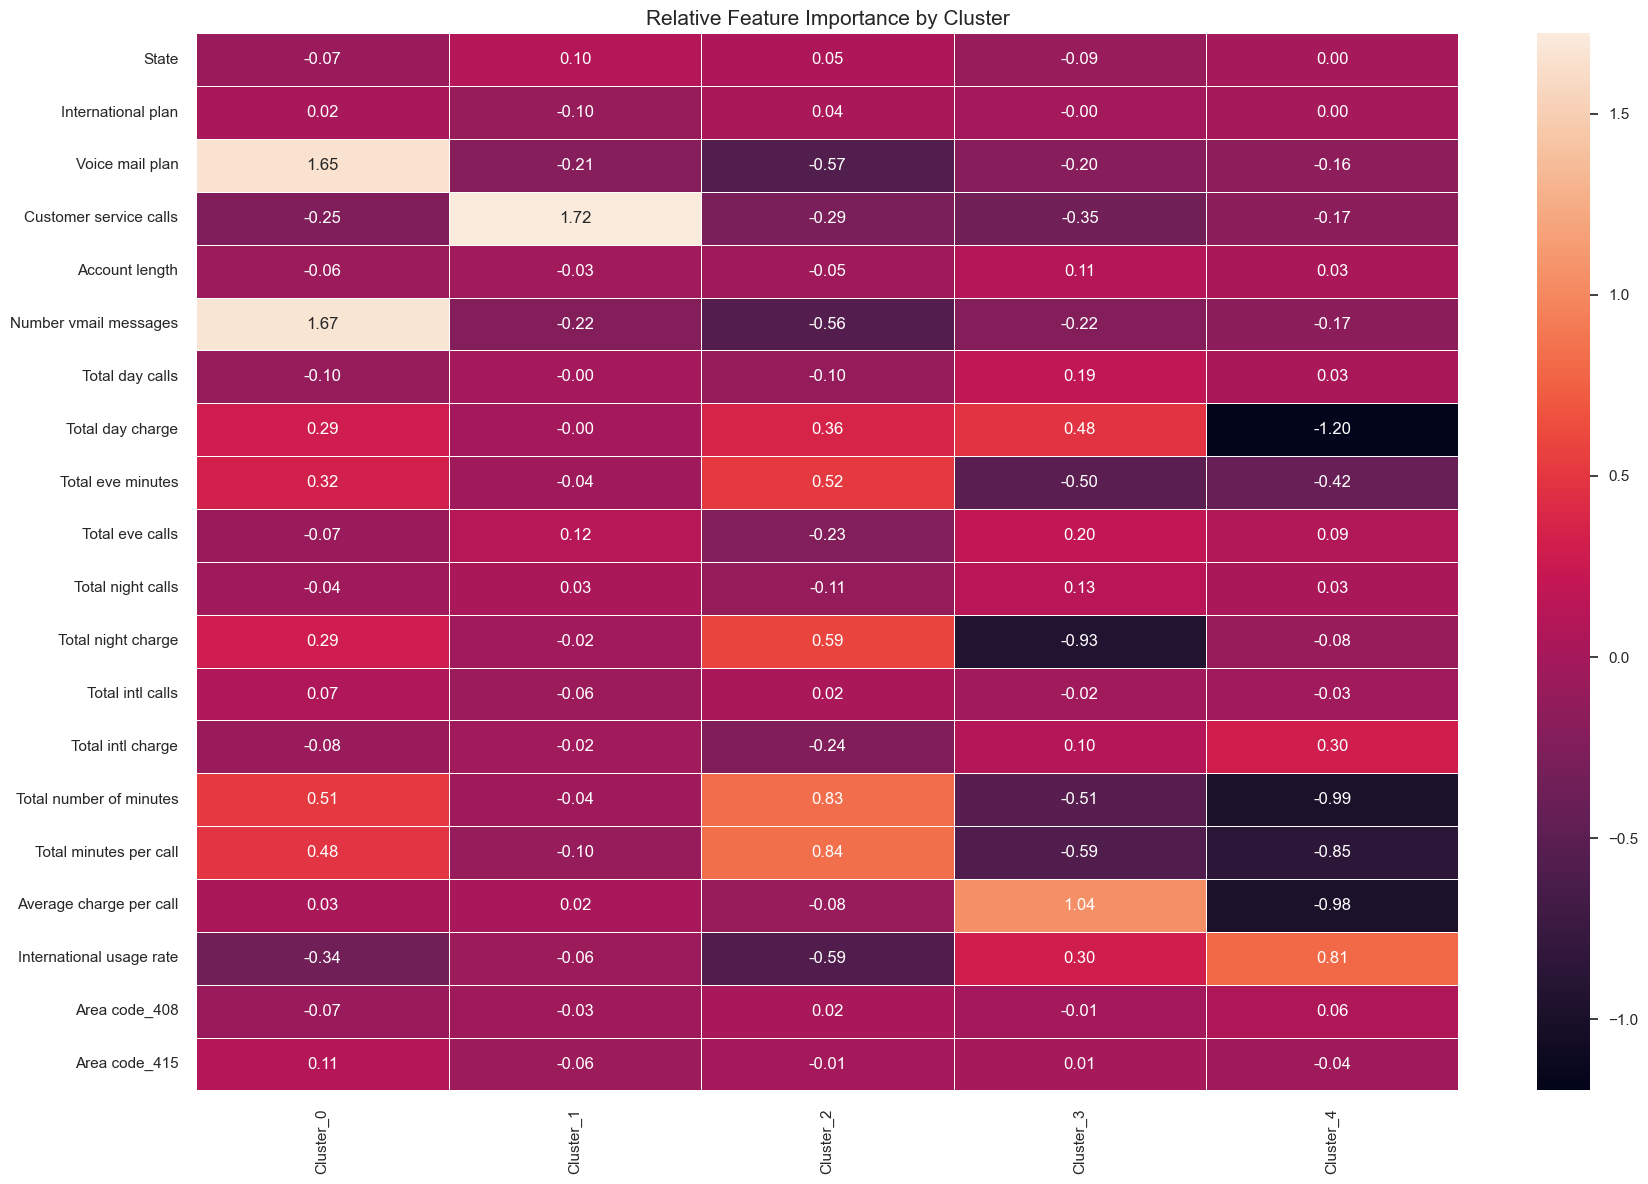

In [139]:
plt.figure(figsize=(18, 12))
sns.heatmap(relative_importance, annot=True, cmap='rocket', fmt='.2f', linewidths=.5)
plt.title('Relative Feature Importance by Cluster', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Interpretation of Relative Feature Importance by Cluster

This heatmap shows how each feature contributes to the cluster centers. Based on it, we interpret the clusters as follows:

**Cluster 0 (6% churn)**: Key features are number of voice mail messages and voice mail plan. These users likely have low overall usage.

**Cluster 1 (30% churn)**: Dominated by customer service calls, suggesting frequent support interactions and potential dissatisfaction, which may explain the high churn.

**Cluster 2 (21% churn)**: Influenced by total number of minutes and minutes per call. This may include low-usage customers who don’t find value in their plan, or high-usage customers dissatisfied with pricing.

**Cluster 3 (8% churn)**: Most distinctive feature is total night charge. Could represent users who make more calls at night.

**Cluster 4 (8% churn)**: Driven by total day charge, total minutes, minutes per call, average charge per call, and international usage rate. Likely a mix of international or high-value users with varied usage patterns.


In [161]:
sample_size = min(1000, clustering_data.shape[0])
sample_indices = np.random.choice(clustering_data.shape[0], sample_size, replace=False)
sample_data = clustering_data.iloc[sample_indices]

In [141]:
linkage_matrix = linkage(sample_data, method='ward')

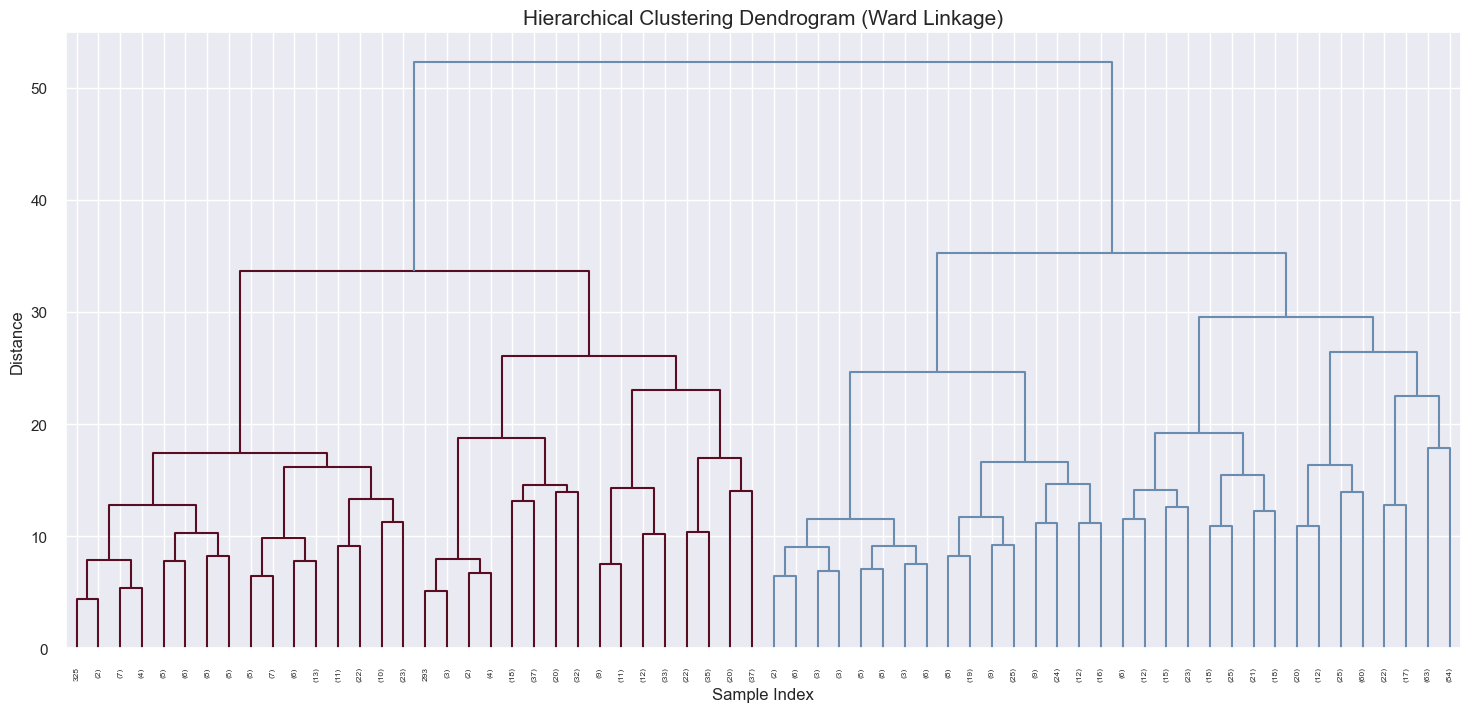

In [142]:
plt.figure(figsize=(18, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=15)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

In [143]:
cluster_profiles = processed_train.copy()
cluster_profiles['Cluster'] = kmeans_labels
cluster_profiles['Churn'] = val_train.values

In [144]:
cluster_summary = cluster_profiles.groupby('Cluster').agg({
    'Churn': 'mean',
    'State': 'mean',
    'Account length': 'mean',
    'International plan': 'mean',
    'Voice mail plan': 'mean',
    'Number vmail messages': 'mean',
    'Total day charge': 'mean',
    'Total eve minutes': 'mean',
    'Total night calls': 'mean',
    'Customer service calls': 'mean',
    'Total intl calls': 'mean'
}).sort_values('Churn', ascending=False)

In [145]:
cluster_summary.columns = [
    'Churn Rate', 
    'State Risk Level', 
    'Avg Account Length', 
    'Int\'l Plan Rate', 
    'Voice Mail Plan Rate', 
    'Avg VM Messages', 
    'Avg Day Charge', 
    'Avg Eve Minutes', 
    'Avg Night Calls',
    'Avg CS Calls',
    'Avg Int\'l Calls'
]

In [146]:
cluster_summary['Churn Rate'] = cluster_summary['Churn Rate'].map('{:.1%}'.format)
cluster_summary['Int\'l Plan Rate'] = cluster_summary['Int\'l Plan Rate'].map('{:.1%}'.format)
cluster_summary['Voice Mail Plan Rate'] = cluster_summary['Voice Mail Plan Rate'].map('{:.1%}'.format)

In [147]:
print("K-Means Cluster Profiles (sorted by Churn Rate):")
cluster_summary

K-Means Cluster Profiles (sorted by Churn Rate):


Churn Rate  State Risk Level  Avg Account Length Int'l Plan Rate  \
Cluster                                                                    
1            30.6%          1.030928           99.429553            6.9%   
2            21.2%          0.995041           98.537190           11.1%   
3             8.2%          0.893096          104.993318            9.8%   
4             7.9%          0.957014          101.893665           10.0%   
0             6.1%          0.907246           98.336232           10.4%   

        Voice Mail Plan Rate  Avg VM Messages  Avg Day Charge  \
Cluster                                                         
1                      17.5%         4.824742       30.498935   
2                       1.7%         0.317355       33.821157   
3                      18.0%         4.913140       34.924343   
4                      19.9%         5.615385       19.498891   
0                     100.0%        30.330435       33.175739   

         Avg Eve Minutes  Avg Night Calls  Avg CS Calls  Avg Int'l Calls  
Cluster                                                                   
1             198.727491       100.975945      3.831615         4.329897  
2             227.229917        98.234711      1.183471         4.533884  
3             175.023831       102.988864      1.106904         4.416481  
4             179.306335       100.923077      1.343891         4.414027  
0             217.371594        99.608696      1.237681         4.657971

## Churn Prediction

In [148]:
def fit_preds(X_train, X_test, y_train, model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [149]:
random_state = 42

classifiers = []
classifiers.append(LogisticRegression(random_state=random_state, max_iter=1000))
classifiers.append(
    AdaBoostClassifier(
        DecisionTreeClassifier(random_state=random_state),
        random_state=random_state,
        learning_rate=0.1
    )
)
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state = random_state))
classifiers.append(CatBoostClassifier(logging_level='Silent'))

In [150]:
kfold = StratifiedKFold(5)

In [151]:
accuracy = []
precision = []
recall = []
f1 = []
f2 =[]
roc_auc = []

for classifier in classifiers :
    y_pred = cross_val_predict(classifier, processed_train_wf, val_train, cv = kfold)
    accuracy.append(accuracy_score(y_pred, val_train))
    precision.append(precision_score(y_pred, val_train))
    recall.append(recall_score(y_pred, val_train))
    f1.append(f1_score(y_pred, val_train))
    f2.append(fbeta_score(y_pred, val_train, beta = 2))
    roc_auc.append(roc_auc_score(y_pred, val_train))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145455 -> initscore=-1.770706
[LightGBM] [Info] Start training from score -1.770706
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Number of data points in the train set: 1705, number of used feature

In [152]:
index = ["LogisticRegression", "AdaBoost", "RandomForest", "ExtraTrees", "GradientBoosting", "LGBMClassifier", "CatBoostClassifier"]
df = pd.DataFrame({"Accuracy" : accuracy, "Precision" : precision, "Recall" : recall, "f1" : f1, "f2" : f2, "roc_auc" : roc_auc})
df.index = index

In [153]:
df.sort_values(["f2"],ascending = False)

Accuracy  Precision    Recall        f1        f2  \
LGBMClassifier      0.964353   0.790323  0.957031  0.865724  0.918291   
RandomForest        0.956848   0.719355  0.978070  0.828996  0.912439   
CatBoostClassifier  0.962008   0.780645  0.949020  0.856637  0.909774   
GradientBoosting    0.958724   0.758065  0.947581  0.842294  0.902458   
ExtraTrees          0.922139   0.496774  0.939024  0.649789  0.797101   
AdaBoost            0.923546   0.722581  0.744186  0.733224  0.739762   
LogisticRegression  0.882739   0.358065  0.685185  0.470339  0.579332   

                     roc_auc  
LGBMClassifier      0.961192  
RandomForest        0.966188  
CatBoostClassifier  0.956396  
GradientBoosting    0.953886  
ExtraTrees          0.929878  
AdaBoost            0.848609  
LogisticRegression  0.792085

## Hyperparameter Optimization

In [154]:
param_distributions = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 12),
    'num_leaves': np.arange(20, 200, 20),
    'min_child_samples': np.arange(5, 100, 5),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5)
}

In [155]:
lgbm = LGBMClassifier(random_state=random_state)

In [156]:
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [157]:
random_search.fit(processed_train_wf, val_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Number of positive: 248, number of negative: 1458
[LightGBM] [Info] Number of positive: 248, number of negative: 1458
[LightGBM] [Info] Number of positive: 248, number of negative: 1457
[LightGBM] [Info] Number o

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_child_samples': array([ 5, 10, 15, 20, 25, 3...5, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'num_leaves': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180]),
                                        'reg_alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'reg_lambda': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='f1', verbose=1)

In [158]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_alpha': 0.01, 'num_leaves': 100, 'n_estimators': 250, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.046415888336127774, 'colsample_bytree': 0.6}
Best cross-validation score: 0.8579


In [159]:
bst_lgbm = LGBMClassifier(
    subsample=0.8,
    reg_lambda=0.001,
    reg_alpha=0.01,
    num_leaves=100,
    n_estimators=250,
    min_child_samples=5,
    max_depth=5,
    learning_rate=0.046415888336127774,
    colsample_bytree=0.6,
    random_state=random_state
)

In [160]:
y_pred = fit_preds(processed_train, processed_test, val_train, random_search.best_estimator_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 310, number of negative: 1822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3398
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145403 -> initscore=-1.771118
[LightGBM] [Info] Start training from score -1.771118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Fatal] The number of features in data (23) is not the same as it was in training data (27).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.


LightGBMError: The number of features in data (23) is not the same as it was in training data (27).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

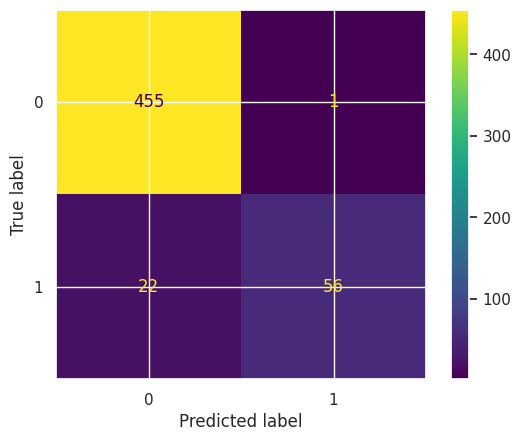

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [ ]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.98      0.72      0.83        78

    accuracy                           0.96       534
   macro avg       0.97      0.86      0.90       534
weighted avg       0.96      0.96      0.95       534



In [ ]:
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'max_samples': [0.5, 0.7, 0.9, None]
}

In [ ]:
rf_model = RandomForestClassifier(random_state=random_state)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    random_state=42,
    return_train_score=True
)

In [ ]:
random_search.fit(processed_train_wf, val_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=30, n_estimators=600;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balan

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': [0.5, 0.7, 0.9, None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=3)

In [ ]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_samples': 0.9, 'max_features': None, 'max_depth': 100, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Best cross-validation score: 0.8594


In [ ]:
bst_rf = RandomForestClassifier(
    n_estimators=900, 
    min_samples_split=5, 
    min_samples_leaf=6, 
    max_samples=0.9, 
    max_features=None, 
    max_depth=100, 
    criterion='entropy', 
    class_weight='balanced', 
    bootstrap=True,
    random_state=random_state
)

In [ ]:
y_pred = fit_preds(processed_train, processed_test, val_train, random_search.best_estimator_)

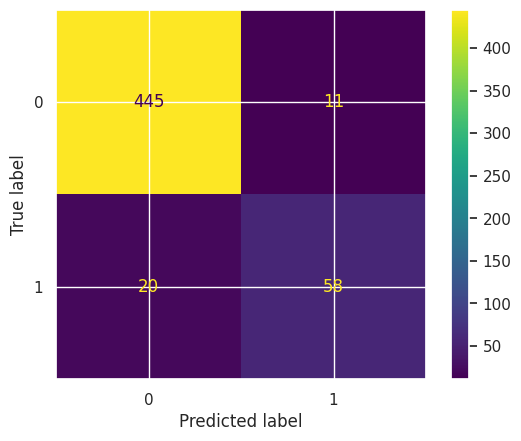

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [ ]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.84      0.74      0.79        78

    accuracy                           0.94       534
   macro avg       0.90      0.86      0.88       534
weighted avg       0.94      0.94      0.94       534



In [ ]:
param_distributions = {
    'learning_rate': np.logspace(-3, 0, 10),
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'iterations': [100, 200, 300, 400, 500],
    'l2_leaf_reg': [1, 3, 5, 10, 30, 100],
    'border_count': [32, 64, 128, 254],
    'bagging_temperature': np.linspace(0, 1, 6),
    'random_strength': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'scale_pos_weight': [0.2, 0.5, 1, 2, 5, 10],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
    'subsample': np.linspace(0.5, 1.0, 6),
}

In [ ]:
base_params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': False,
    'random_seed': 42
}

catboost_model = CatBoostClassifier(**base_params)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_distributions,
    n_iter=25,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    random_state=42,
    return_train_score=True
)

In [ ]:
random_search.fit(processed_train_wf, val_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 3/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128, depth=4, grow_policy=Depthwise, iterations=100, l2_leaf_reg=1, learning_rate=0.046415888336127774, random_strength=1e-06, scale_pos_weight=5, subsample=0.9;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128, depth=4, grow_policy=Depthwise, iterations=100, l2_leaf_reg=1, learning_rate=0.046415888336127774, random_strength=1e-06, scale_pos_weight=5, subsample=0.9;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128, depth=4, grow_policy=Depthwise, iterations=100, l2_leaf_reg=1, learning_rate=0.046415888336127774, random_strength=1e-06, scale_pos_weight=5, subsample=0.9;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END bagging_temperature=0.8, bootstrap_type=Bayesian, border_count=128,

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f18642c4740>,
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bagging_temperature': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'bootstrap_type': ['Bayesian',
                                                           'Bernoulli', 'MVS'],
                                        'border_count': [32, 64, 128, 254],
                                        'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'grow_policy': ['SymmetricTree',
                                                        'Depthwise',
                                                        'Lossguide'],
                                        'iter...300, 400, 500],
                                        'l2_leaf_reg': [1, 3, 5, 10, 30, 100],
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'random_strength': [1e-09, 1e-08, 1e-07,
                                                            1e-06, 1e-05],
                                        'scale_pos_weight': [0.2, 0.5, 1, 2, 5,
                                                             10],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=3)

In [ ]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'subsample': 0.9, 'scale_pos_weight': 10, 'random_strength': 1e-06, 'learning_rate': 0.21544346900318823, 'l2_leaf_reg': 3, 'iterations': 200, 'grow_policy': 'Lossguide', 'depth': 4, 'border_count': 128, 'bootstrap_type': 'MVS', 'bagging_temperature': 0.6000000000000001}
Best cross-validation score: 0.8525


In [ ]:
bst_cb = CatBoostClassifier(
    subsample=0.9, 
    scale_pos_weight=10, 
    random_strength=1e-06, 
    learning_rate=0.21544346900318823, 
    l2_leaf_reg=3, 
    iterations=200, 
    grow_policy='Lossguide', 
    depth=4, 
    border_count=128, 
    bootstrap_type='MVS', 
    bagging_temperature=0.6000000000000001,
    random_state=random_state
)

In [ ]:
y_pred = fit_preds(processed_train, processed_test, val_train, random_search.best_estimator_)

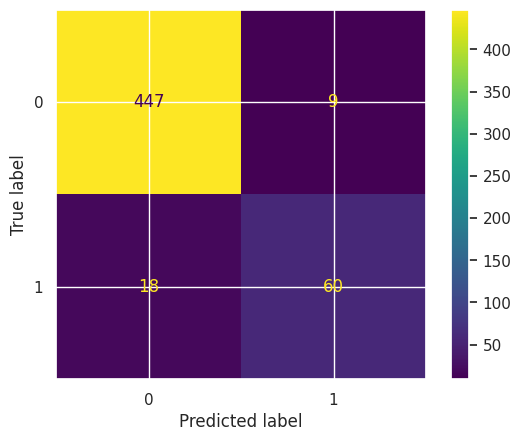

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [ ]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.87      0.77      0.82        78

    accuracy                           0.95       534
   macro avg       0.92      0.87      0.89       534
weighted avg       0.95      0.95      0.95       534



In [ ]:
estimator = []
estimator.append(('RandomForest', bst_rf))
estimator.append(('CatBoost', bst_cb))
estimator.append(('LGBM', bst_lgbm))

In [ ]:
vc_soft = VotingClassifier(estimators = estimator, voting ='soft')

In [ ]:
y_pred = fit_preds(processed_train, processed_test, val_train, model = vc_soft)

0:	learn: 0.4922860	total: 4.06ms	remaining: 809ms
1:	learn: 0.3998747	total: 7.2ms	remaining: 712ms
2:	learn: 0.3473241	total: 9.7ms	remaining: 637ms
3:	learn: 0.3136568	total: 12.3ms	remaining: 601ms
4:	learn: 0.2877161	total: 14.8ms	remaining: 577ms
5:	learn: 0.2713605	total: 18.4ms	remaining: 596ms
6:	learn: 0.2538542	total: 21.3ms	remaining: 587ms
7:	learn: 0.2425043	total: 24ms	remaining: 576ms
8:	learn: 0.2319567	total: 26.5ms	remaining: 563ms
9:	learn: 0.2120434	total: 29.2ms	remaining: 554ms
10:	learn: 0.2033885	total: 31.7ms	remaining: 545ms
11:	learn: 0.1939011	total: 35.6ms	remaining: 558ms
12:	learn: 0.1912806	total: 38.1ms	remaining: 548ms
13:	learn: 0.1845774	total: 40.8ms	remaining: 542ms
14:	learn: 0.1799741	total: 43.4ms	remaining: 536ms
15:	learn: 0.1689282	total: 46.3ms	remaining: 532ms
16:	learn: 0.1611188	total: 49.2ms	remaining: 530ms
17:	learn: 0.1578889	total: 52ms	remaining: 526ms
18:	learn: 0.1552946	total: 54.6ms	remaining: 520ms
19:	learn: 0.1542374	total: 

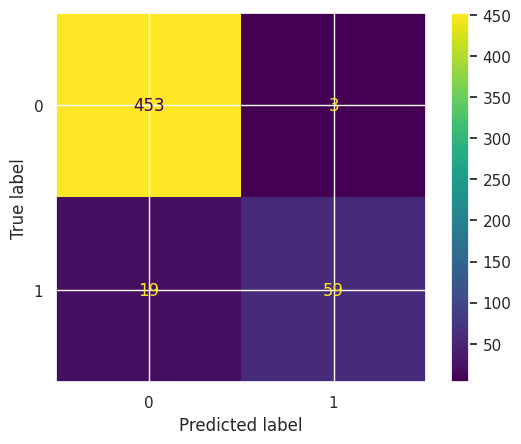

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [ ]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.95      0.76      0.84        78

    accuracy                           0.96       534
   macro avg       0.96      0.87      0.91       534
weighted avg       0.96      0.96      0.96       534



In [ ]:
vc_hard = VotingClassifier(estimators = estimator, voting ='hard')

In [ ]:
y_pred = fit_preds(processed_train, processed_test, val_train, model = vc_hard)

0:	learn: 0.4922860	total: 2.32ms	remaining: 461ms
1:	learn: 0.3998747	total: 4.51ms	remaining: 446ms
2:	learn: 0.3473241	total: 6.6ms	remaining: 434ms
3:	learn: 0.3136568	total: 8.77ms	remaining: 430ms
4:	learn: 0.2877161	total: 11.6ms	remaining: 451ms
5:	learn: 0.2713605	total: 13.8ms	remaining: 446ms
6:	learn: 0.2538542	total: 16ms	remaining: 441ms
7:	learn: 0.2425043	total: 18ms	remaining: 433ms
8:	learn: 0.2319567	total: 20.1ms	remaining: 426ms
9:	learn: 0.2120434	total: 22.1ms	remaining: 419ms
10:	learn: 0.2033885	total: 24.1ms	remaining: 414ms
11:	learn: 0.1939011	total: 27.4ms	remaining: 429ms
12:	learn: 0.1912806	total: 29.5ms	remaining: 424ms
13:	learn: 0.1845774	total: 31.6ms	remaining: 420ms
14:	learn: 0.1799741	total: 33.5ms	remaining: 413ms
15:	learn: 0.1689282	total: 35.6ms	remaining: 410ms
16:	learn: 0.1611188	total: 37.7ms	remaining: 406ms
17:	learn: 0.1578889	total: 39.7ms	remaining: 401ms
18:	learn: 0.1552946	total: 42.4ms	remaining: 404ms
19:	learn: 0.1542374	total:

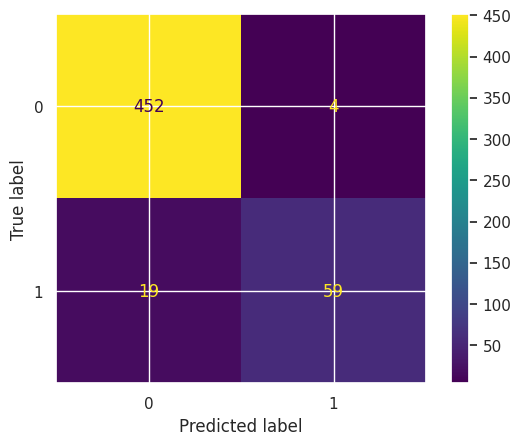

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(val_test,y_pred)).plot()

In [ ]:
print(classification_report(val_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.94      0.76      0.84        78

    accuracy                           0.96       534
   macro avg       0.95      0.87      0.91       534
weighted avg       0.96      0.96      0.95       534



In [ ]:
test_raw.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [ ]:
X_test = test_raw.drop("Churn", axis = 1)
y_test = test_raw["Churn"]

In [ ]:
X_test["State"].replace(churn_less10,0, inplace = True)
X_test["State"].replace(churn_more10,1, inplace = True)
X_test["State"].replace(churn_more20,2, inplace = True)

In [ ]:
X_test.replace(["No","Yes"],[0,1], inplace = True)
X_test.replace([False,True],[0,1], inplace = True)

In [ ]:
X_test["Customer service calls"]=np.where(X_test["Customer service calls"] >= 4, 1,0 )

In [ ]:
X_train = pipeline.fit_transform(train_processsed)
X_test = pipeline.transform(X_test)

In [ ]:
val_processed.value_counts()

Churn
0    2278
1     388
Name: count, dtype: int64

In [ ]:
X_un, y_un = shuffle(X_train, val_processed)

In [ ]:
X_churn = X_un.loc[y_un == 1]
X_non_churn = X_un.loc[y_un == 0][:388]

In [ ]:
y_churn = y_un.loc[y_un == 1]
y_non_churn = y_un.loc[y_un == 0][:388]

In [ ]:
X_undersampled = pd.concat([X_churn, X_non_churn])
y_undersampled = pd.concat([y_churn, y_non_churn])

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, val_processed)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 2278, 1: 2278})


In [ ]:
cat_cols = [0,1,2,17,18]
smote = SMOTENC(cat_cols,random_state=42)

In [ ]:
X_smote, y_smote = smote.fit_resample(X_train, val_processed)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 2278, 1: 2278})


In [ ]:
def plot_roc_curve(y_test,y_pred, ax):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    ax.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel("False positve rate")
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve')
    ax.legend(loc='lower right')

In [ ]:
models = [("Random Forest", bst_rf), ('LightGBM', bst_lgbm),("CatBoost", bst_cb),("Votintg Soft", vc_soft),("Voting hard", vc_hard)]

0:	learn: 0.5174437	total: 2.38ms	remaining: 475ms
1:	learn: 0.4150710	total: 4.6ms	remaining: 455ms
2:	learn: 0.3638810	total: 6.92ms	remaining: 454ms
3:	learn: 0.3340955	total: 9.02ms	remaining: 442ms
4:	learn: 0.3108329	total: 11.7ms	remaining: 455ms
5:	learn: 0.2943367	total: 15.2ms	remaining: 491ms
6:	learn: 0.2792352	total: 17.7ms	remaining: 488ms
7:	learn: 0.2698104	total: 19.8ms	remaining: 476ms
8:	learn: 0.2607193	total: 22ms	remaining: 467ms
9:	learn: 0.2520995	total: 24.3ms	remaining: 461ms
10:	learn: 0.2333811	total: 26.6ms	remaining: 457ms
11:	learn: 0.2238419	total: 29.8ms	remaining: 467ms
12:	learn: 0.2202331	total: 32ms	remaining: 461ms
13:	learn: 0.2129922	total: 34.4ms	remaining: 457ms
14:	learn: 0.2060519	total: 36.6ms	remaining: 451ms
15:	learn: 0.2004924	total: 38.7ms	remaining: 445ms
16:	learn: 0.1923397	total: 40.9ms	remaining: 441ms
17:	learn: 0.1865791	total: 43.3ms	remaining: 437ms
18:	learn: 0.1821904	total: 45.7ms	remaining: 435ms
19:	learn: 0.1808321	total:

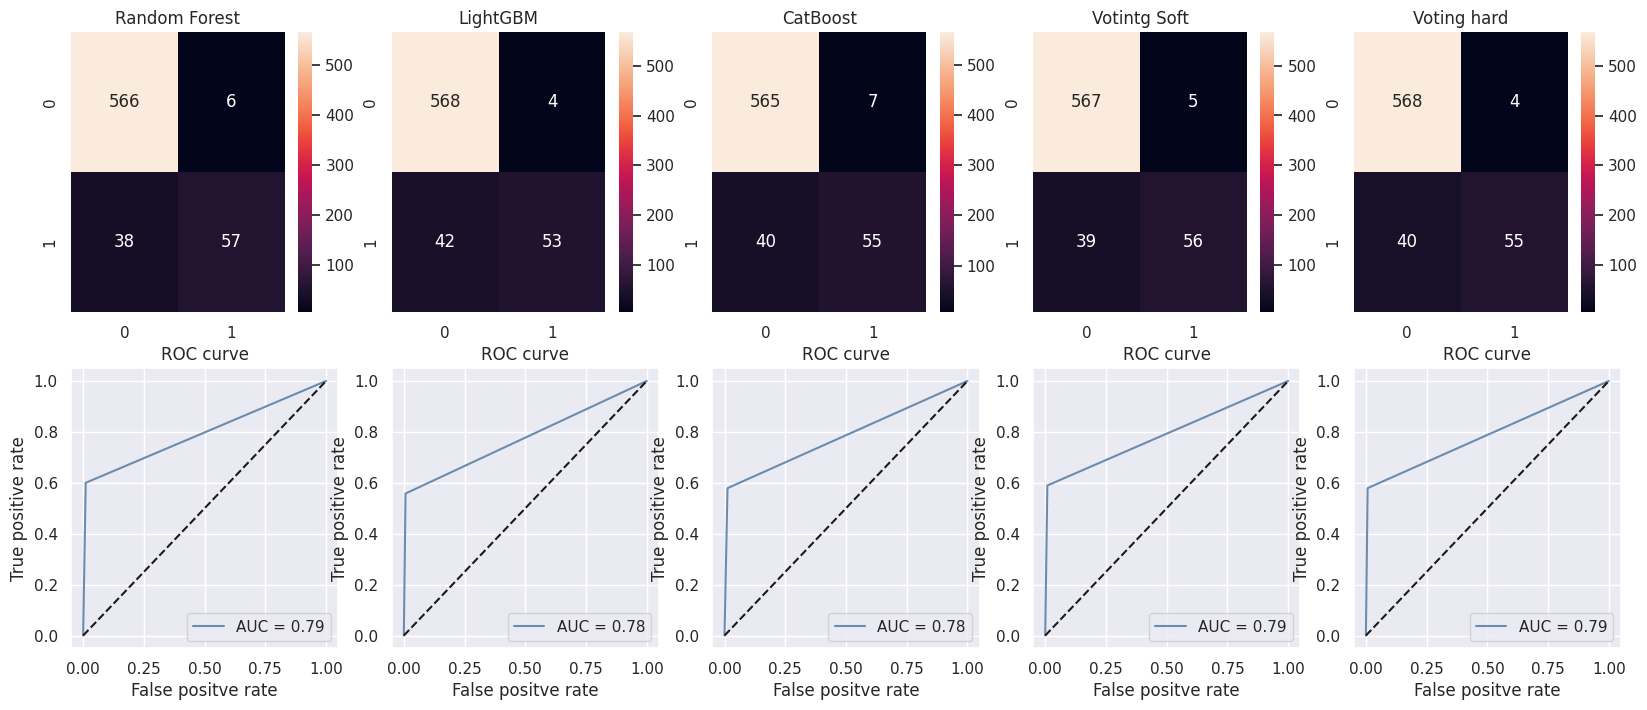

In [ ]:
fig,ax = plt.subplots(2, 5, figsize = (20,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    y_pred = fit_preds(X_train, X_test, val_processed, model = model[1])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax = ax[0,i])
    plot_roc_curve(y_test, y_pred, ax[1,i])

0:	learn: 0.4098411	total: 1.72ms	remaining: 343ms
1:	learn: 0.2845527	total: 3.52ms	remaining: 348ms
2:	learn: 0.2382802	total: 5.12ms	remaining: 336ms
3:	learn: 0.2142976	total: 6.61ms	remaining: 324ms
4:	learn: 0.1862143	total: 9.17ms	remaining: 358ms
5:	learn: 0.1704595	total: 11.2ms	remaining: 361ms
6:	learn: 0.1625460	total: 13.8ms	remaining: 381ms
7:	learn: 0.1529220	total: 15.6ms	remaining: 374ms
8:	learn: 0.1477678	total: 18.2ms	remaining: 387ms
9:	learn: 0.1443004	total: 19.7ms	remaining: 375ms
10:	learn: 0.1411933	total: 21.3ms	remaining: 366ms
11:	learn: 0.1402106	total: 22.9ms	remaining: 359ms
12:	learn: 0.1382504	total: 25.3ms	remaining: 364ms
13:	learn: 0.1347291	total: 27.2ms	remaining: 362ms
14:	learn: 0.1317060	total: 28.8ms	remaining: 355ms
15:	learn: 0.1288948	total: 30.3ms	remaining: 348ms
16:	learn: 0.1285236	total: 31.9ms	remaining: 343ms
17:	learn: 0.1231666	total: 33.4ms	remaining: 338ms
18:	learn: 0.1221569	total: 34.9ms	remaining: 333ms
19:	learn: 0.1207823	t

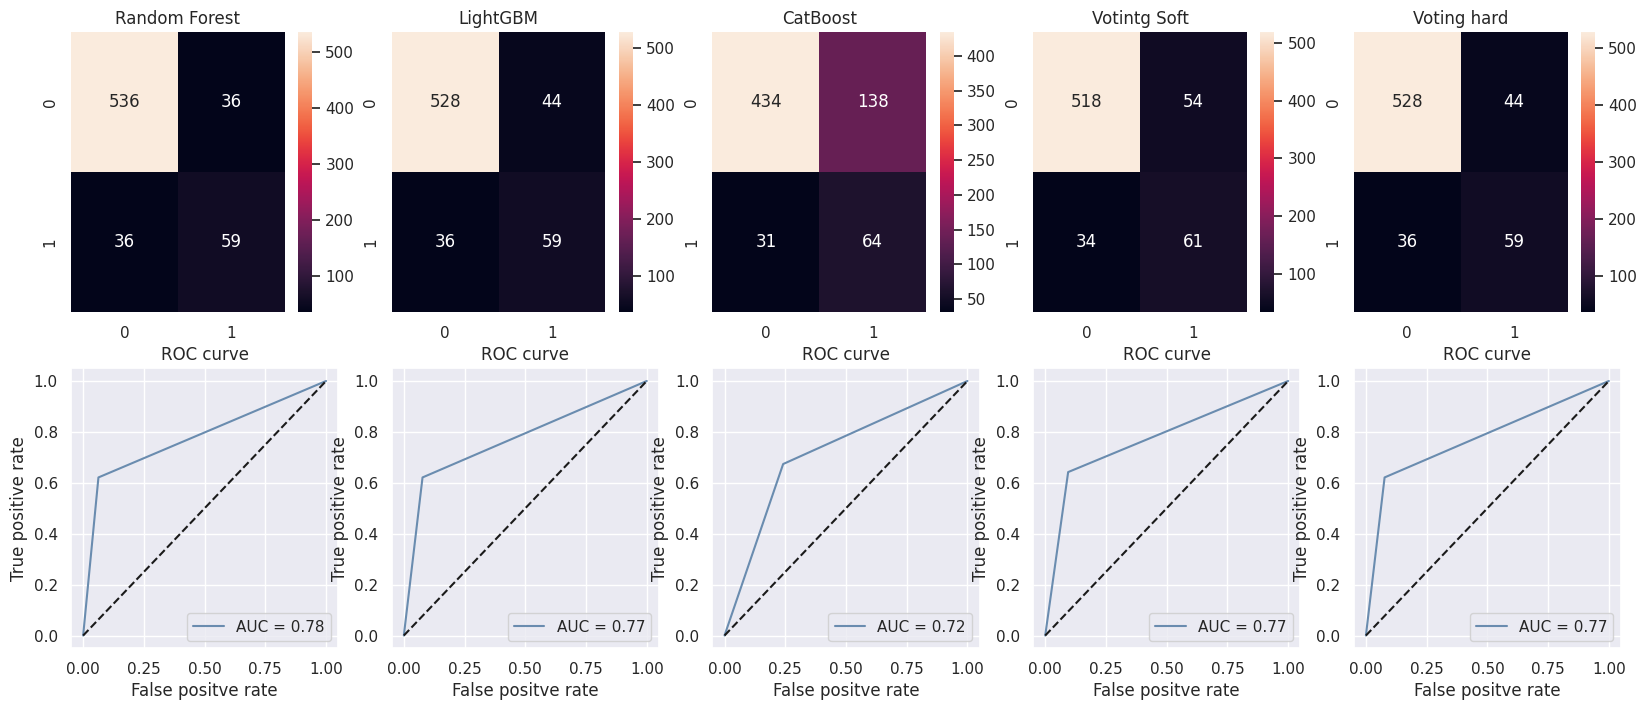

In [ ]:
fig,ax = plt.subplots(2,5, figsize = (20,8))
for i,model in enumerate(models):
    y_pred = fit_preds(X_undersampled, X_test, y_undersampled, model = model[1])
    ax[0,i].set_title(model[0])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test, y_pred, ax[1,i])

0:	learn: 0.4084585	total: 4.41ms	remaining: 877ms
1:	learn: 0.2771236	total: 7.83ms	remaining: 775ms
2:	learn: 0.2330079	total: 10.5ms	remaining: 687ms
3:	learn: 0.2134405	total: 13.1ms	remaining: 643ms
4:	learn: 0.1924335	total: 15.7ms	remaining: 613ms
5:	learn: 0.1813775	total: 19.4ms	remaining: 626ms
6:	learn: 0.1735225	total: 22.1ms	remaining: 609ms
7:	learn: 0.1590408	total: 24.8ms	remaining: 594ms
8:	learn: 0.1514963	total: 27.4ms	remaining: 582ms
9:	learn: 0.1471262	total: 30.1ms	remaining: 572ms
10:	learn: 0.1392196	total: 33.4ms	remaining: 574ms
11:	learn: 0.1349975	total: 36.5ms	remaining: 572ms
12:	learn: 0.1307546	total: 39.2ms	remaining: 563ms
13:	learn: 0.1252803	total: 41.9ms	remaining: 557ms
14:	learn: 0.1227576	total: 44.6ms	remaining: 550ms
15:	learn: 0.1220544	total: 47.3ms	remaining: 544ms
16:	learn: 0.1214362	total: 50.5ms	remaining: 544ms
17:	learn: 0.1184031	total: 53.8ms	remaining: 544ms
18:	learn: 0.1141866	total: 56.5ms	remaining: 539ms
19:	learn: 0.1117087	t

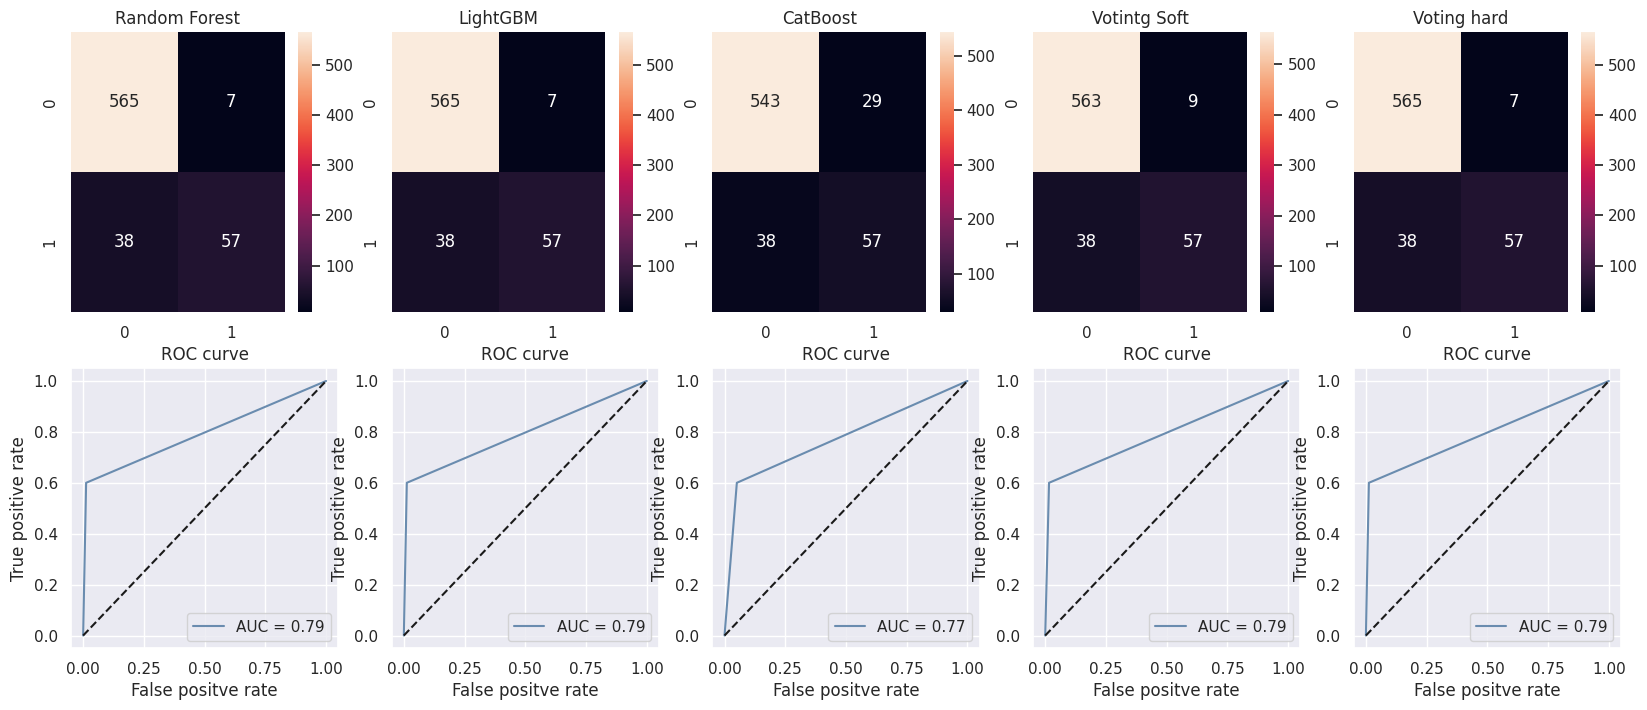

In [ ]:
fig,ax = plt.subplots(2,5, figsize = (20,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    y_pred = fit_preds(X_resampled, X_test, y_resampled, model = model[1])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test, y_pred, ax[1,i])

0:	learn: 0.4199402	total: 2.49ms	remaining: 496ms
1:	learn: 0.3286288	total: 4.93ms	remaining: 489ms
2:	learn: 0.2779620	total: 7.51ms	remaining: 493ms
3:	learn: 0.2326503	total: 14.8ms	remaining: 727ms
4:	learn: 0.1918186	total: 18.6ms	remaining: 724ms
5:	learn: 0.1839276	total: 21.3ms	remaining: 688ms
6:	learn: 0.1740479	total: 24ms	remaining: 663ms
7:	learn: 0.1624677	total: 29ms	remaining: 696ms
8:	learn: 0.1532284	total: 34.5ms	remaining: 733ms
9:	learn: 0.1513688	total: 37ms	remaining: 703ms
10:	learn: 0.1482350	total: 39.4ms	remaining: 677ms
11:	learn: 0.1421029	total: 43.4ms	remaining: 681ms
12:	learn: 0.1390482	total: 49.7ms	remaining: 715ms
13:	learn: 0.1360412	total: 52.1ms	remaining: 692ms
14:	learn: 0.1340326	total: 54.5ms	remaining: 672ms
15:	learn: 0.1309376	total: 59.2ms	remaining: 681ms
16:	learn: 0.1254199	total: 63.2ms	remaining: 681ms
17:	learn: 0.1227007	total: 65.8ms	remaining: 665ms
18:	learn: 0.1206622	total: 68.2ms	remaining: 649ms
19:	learn: 0.1176523	total: 

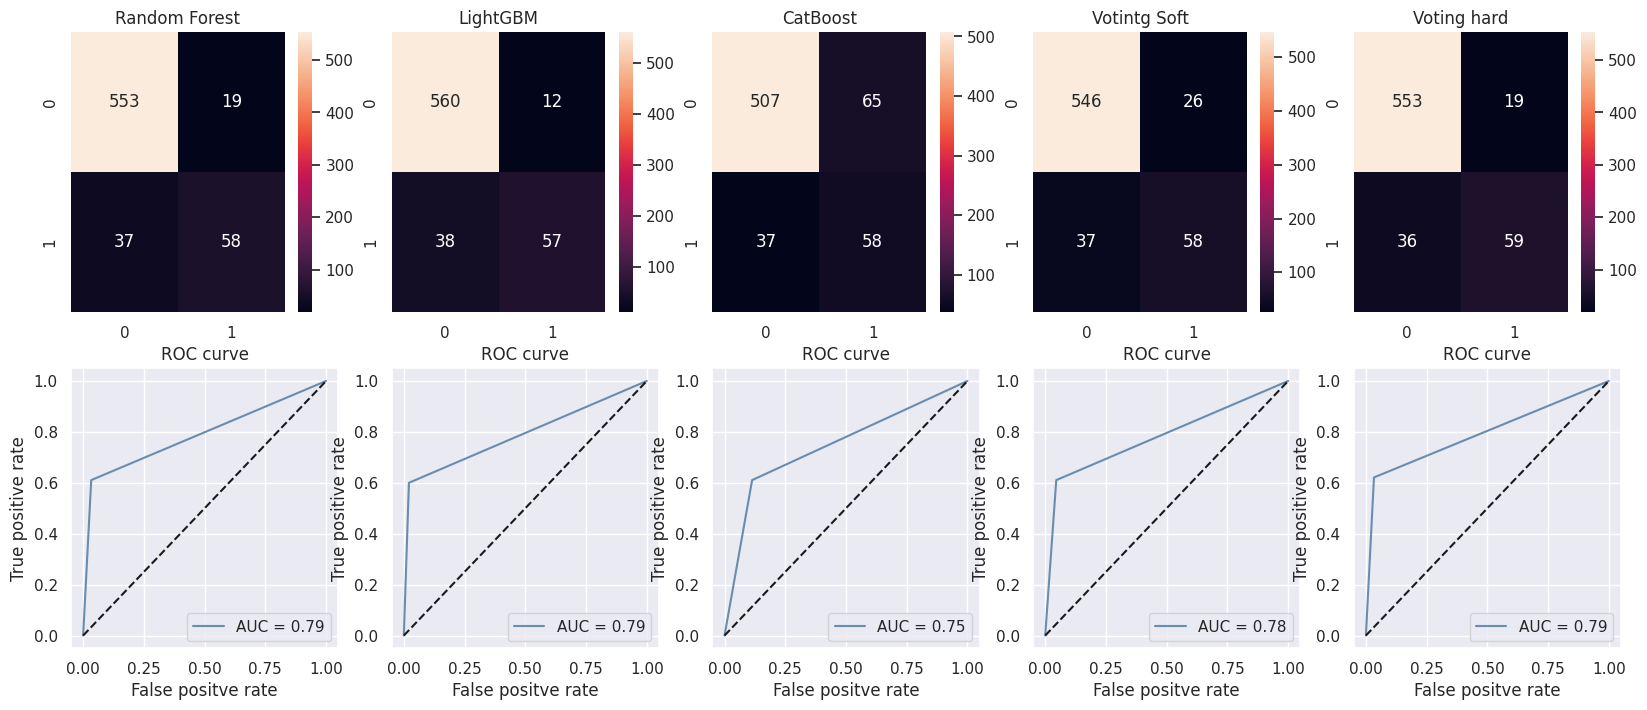

In [ ]:
fig,ax = plt.subplots(2,5, figsize = (20,8))
for i,model in enumerate(models):
    ax[0,i].set_title(model[0])
    y_pred = fit_preds(X_smote, X_test, y_smote, model = model[1])
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',ax = ax[0,i])
    plot_roc_curve(y_test,y_pred,ax[1,i])

In [ ]:
y_pred = fit_preds(X_train, X_test, val_processed, model = bst_rf)
importances = bst_rf.feature_importances_

In [ ]:
importances_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

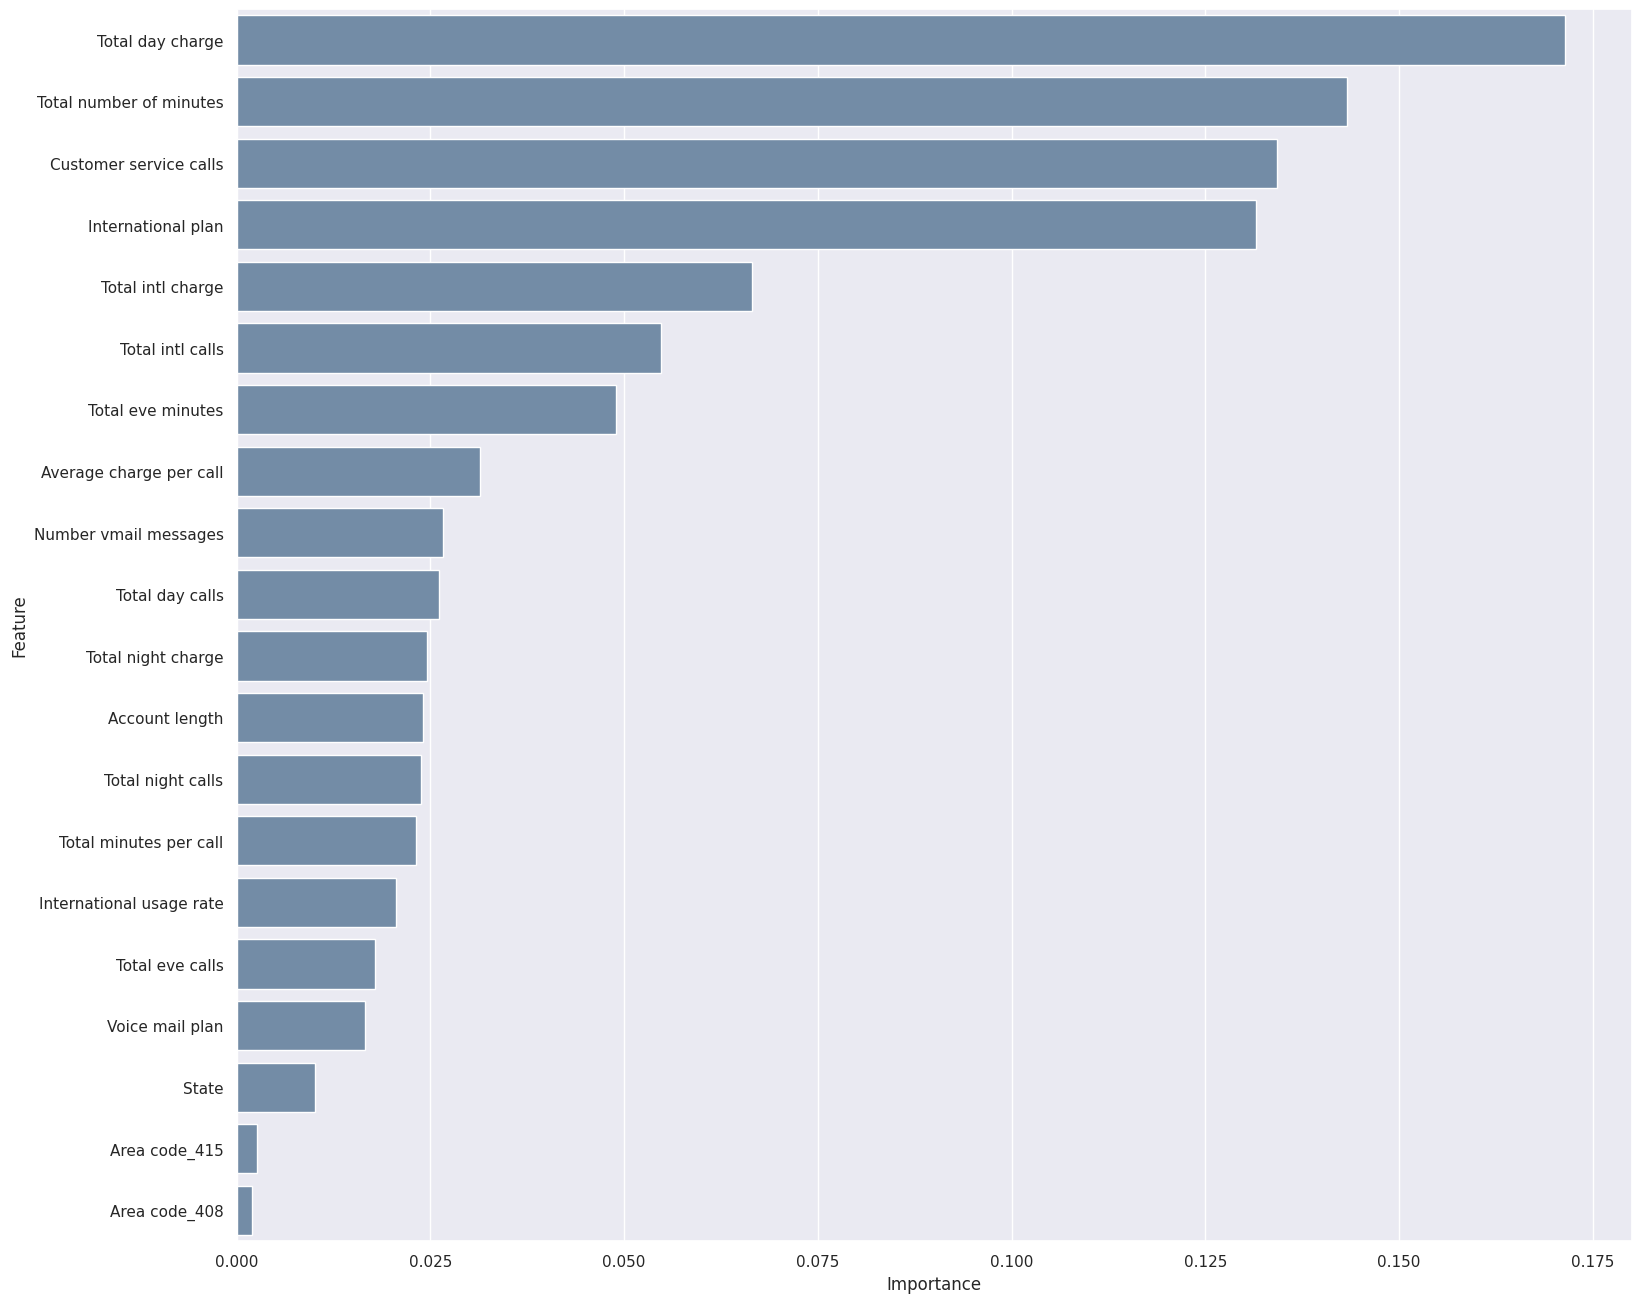

In [ ]:
plt.figure(figsize=(18, 16))
sns.barplot(x="Importance", y="Feature", data=importances_df)
plt.show()